In [1]:
# 安装 openpyxl（如果尚未安装）
!pip install openpyxl
! pip3 install tabulate
# 导入基础库
import sys
import psutil

# 打印 Python 版本与可用内存
print("Python 版本:", sys.version)
print(f"可用内存: {psutil.virtual_memory().available / (1024**3):.2f} GB")

# 在 Notebook 中启用内联绘图
%matplotlib inline

# 科学计算与绘图相关库
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

# HDDM 相关库
import pymc as pm
import hddm
import kabuki
import arviz as az

# 输出各库的版本信息
print("The current HDDM version is:", hddm.__version__)
print("The current kabuki version is:", kabuki.__version__)
print("The current PyMC version is:", pm.__version__)
print("The current ArviZ version is:", az.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 32.8 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Python 版本: 3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:56:21) 
[GCC 10.3.0]
可用内存: 186.10 GB
The current HDDM version is: 1.0.1RC
The current kabuki version is: 0.6.5RC4
The current PyMC version is: 2.3.8
The current ArviZ version is: 0.15.1


In [2]:
import pandas as pd
import hddm  # 保留，后续可用于建模
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    # ================================
    # 1. 读取数据
    # ================================
    trial_data = pd.read_excel('combined_stroop_gonogo.xlsx')
    
    # ================================
    # 2. 直接打印
    # ================================
    print(f"已读取数据，行数：{trial_data.shape[0]}，列数：{trial_data.shape[1]}")
    print(trial_data.head())

if __name__ == '__main__':
    main()

已读取数据，行数：270964，列数：14
      ID  subj_raw  response         stim  Gender     rt Sample    Site   
0  84074     10104         1   Congruent        1  0.947   Main  Lupeng  \
1  84075     10104         1   Congruent        1  0.530   Main  Lupeng   
2  84076     10104         1  Incongruent       1  0.358   Main  Lupeng   
3  84077     10104         1      Neutral       1  0.408   Main  Lupeng   
4  84078     10104         0      Neutral       1  0.539   Main  Lupeng   

       Time           NewSubject  raw age  age     subj_idx    task  
0  Baseline  10104_Main_Baseline       15   13  10104Lupeng  Stroop  
1  Baseline  10104_Main_Baseline       15   13  10104Lupeng  Stroop  
2  Baseline  10104_Main_Baseline       15   13  10104Lupeng  Stroop  
3  Baseline  10104_Main_Baseline       15   13  10104Lupeng  Stroop  
4  Baseline  10104_Main_Baseline       15   13  10104Lupeng  Stroop  


In [3]:
# 独立 Cell：读取过滤后数据并生成三线表
import pandas as pd

# 从文件重新读取过滤后的数据
data = pd.read_excel('combined_stroop_gonogo.xlsx')
print(f"已重新读取过滤后的数据，行数：{data.shape[0]}")

已重新读取过滤后的数据，行数：270964


In [4]:
import hddm
# 确保数据格式正确（Pandas DataFrame）
print(f"Data type: {type(data)}")

Data type: <class 'pandas.core.frame.DataFrame'>


In [5]:
import pandas as pd
import hddm

# ——— 假设 data 已经加载为包含 task、stim 等列的 DataFrame ———

# 1. 筛选出 Stroop 任务
data_stroop = data[data['task'] == 'Stroop'].copy()
print(f"筛选出 Stroop 任务，共计 {len(data_stroop)} 条记录。")

# 2. 筛选出 Stroop 任务中 Incongruent 试次
#    假设已有列 'stim' 且取值为 'Congruent' / 'Incongruent'
data_m0Stroop = data_stroop[data_stroop['stim'] == 'Incongruent'].copy()
print(f"筛选出 Incongruent 试次，共计 {len(data_m0Stroop)} 条记录。")

# 3. 构建基础层次模型（不考虑年龄或其他协变量）
m0Stroop = hddm.HDDM(
    data_m0Stroop,
    include=['a', 'v', 't', 'z', 'sv', 'sz', 'st'],
    p_outlier=0.05
)
print("基础模型 m0 已创建（仅 Incongruent，p_outlier=0.05）。")


# ——— 假设 data 已经加载为包含 task、stim、age 等列的 DataFrame ———

# 1. 筛选出 Stroop 任务
data_stroop = data[data['task'] == 'Stroop'].copy()
print(f"筛选出 Stroop 任务，共计 {len(data_stroop)} 条记录。")

# 2. 筛选出 Stroop 任务中 Incongruent 试次
data_m1Stroop = data_stroop[data_stroop['stim'] == 'Incongruent'].copy()
print(f"筛选出 Incongruent 试次，共计 {len(data_m1Stroop)} 条记录。")

# 3. 构建包含年龄协变量的层次模型
# age 作为连续变量影响多个参数
m1Stroop = hddm.HDDM(
    data_m1Stroop,
    include=['a', 'v', 't', 'z', 'sv', 'sz', 'st'],
    depends_on={'v': 'age', 'a': 'age', 't': 'age', 'z': 'age'},
    p_outlier=0.05
)
print("包含年龄协变量的模型 m1 已创建（v, a, t, z 参数均随 age 变化）。")

筛选出 Stroop 任务，共计 55523 条记录。
筛选出 Incongruent 试次，共计 18019 条记录。
No model attribute --> setting up standard HDDM
Set model to full_ddm
基础模型 m0 已创建（仅 Incongruent，p_outlier=0.05）。
筛选出 Stroop 任务，共计 55523 条记录。
筛选出 Incongruent 试次，共计 18019 条记录。
No model attribute --> setting up standard HDDM
Set model to full_ddm
包含年龄协变量的模型 m1 已创建（v, a, t, z 参数均随 age 变化）。


In [6]:
import pandas as pd
from hddm import HDDMStimCoding  # HDDMStimCoding 包含 split_param 参数

# 1. 读取数据（假设 data 已经加载为包含 task、response、age 等列的 DataFrame）
data = pd.read_excel('combined_stroop_gonogo.xlsx')

# 2. 筛选出 Go/NoGo 任务
data_gonogo = data[
    data['task']
        .str.lower()
        .str.replace('-', '')
        .str.contains('gonogo')
].copy()
print(f"筛选出 Go/NoGo 任务，共计 {len(data_gonogo)} 条记录。")

# 3. 确保 response 列为数值型（HDDM 要求 0/1 编码）
data_gonogo['response'] = pd.to_numeric(data_gonogo['response'], errors='coerce')

# 4. 构建基础层次模型：使用 HDDMStimCoding 并 split_param='v'
m0Gonogo = HDDMStimCoding(
    data_gonogo,
    stim_col='response',
    split_param='v',
    include=['a', 'v', 't', 'z', 'sv', 'sz', 'st'],
    p_outlier=0.05
)

print("基础模型 m0Gonogo 已创建（Go/NoGo，split_param='v'）。")

# 5. 构建包含年龄协变量的层次模型，同样 split_param='v'
m1Gonogo = HDDMStimCoding(
    data_gonogo,
    stim_col='response',
    split_param='v',
    include=['a', 'v', 't', 'z', 'sv', 'sz', 'st'],
    depends_on={'v': 'age', 'a': 'age', 't': 'age', 'z': 'age'},
    p_outlier=0.05
)
print("包含年龄协变量的模型 m1Gonogo 已创建（v 参数随 age 变化，split_param='v'）。")

筛选出 Go/NoGo 任务，共计 215441 条记录。
No model attribute --> setting up standard HDDM
Set model to full_ddm
基础模型 m0Gonogo 已创建（Go/NoGo，split_param='v'）。
No model attribute --> setting up standard HDDM
Set model to full_ddm
包含年龄协变量的模型 m1Gonogo 已创建（v 参数随 age 变化，split_param='v'）。


In [ ]:
def run_sampling(
    m,
    n_samples=15000,  # 10,000
    n_burn=5000,     # 5000
    n_chains=4,      # 测试是1轮；正式是3轮
    thin=2,  # Thinning：每隔2个样本保留1个
    model_name="m",
    progress_bar=True
):
    m_infdata = m.sample(
        n_samples,
        burn=n_burn,
        chains=n_chains,
        return_infdata=True,
        save_name="8.model_fitted/" + model_name,
        progress_bar=progress_bar
    )

    return m, m_infdata


# 计算时间估计
print('拟合参数设置成功!')

拟合参数设置成功!


In [ ]:
import time
import dill as pickle  # 使用 dill 代替 pickle

# 模型列表：改为 m0Stroop 和 m0Gonogo
models = ["m0Stroop", "m1Stroop", "m0Gonogo", "m1Gonogo"
]
model_names = [
    "m0Stroop","m1Stroop", "m0Gonogo", "m1Gonogo"
]

# 创建一个字典存储结果
results = {}

for model, name in zip(models, model_names):
    print(f"Running model {name}... 🏃🏃🏃")
    start_time = time.time()
    
    # 运行采样（假设 run_sampling 函数已定义并接受 model, model_name）
    model, model_infdata = run_sampling(model, model_name=name)
    elapsed_time = time.time() - start_time
    
    # 保存模型和推断结果
    with open(f'./2.模型拟合-输出/{name}_model.pkl', 'wb') as f_model:
        pickle.dump(model, f_model)
        
    with open(f'./2.模型拟合-输出/{name}_infdata.pkl', 'wb') as f_infdata:
        pickle.dump(model_infdata, f_infdata)
    
    results[name] = (model, model_infdata)
    
    print(f"Model {name} completed in {elapsed_time:.2f} seconds.")
    print(f"Model {name} and inference data saved as {name}_model.pkl and {name}_infdata.pkl.\n")

print('模型训练全部完成 😂!')

In [ ]:
import pickle
model_names = ["m0Stroop","m0Gonogo", "m1Stroop", "m1Gonogo"]
models = {}
infdata = {}

# 加载所有模型和推断数据
for name in model_names:
    model_file_path = f'./2.模型拟合-输出/{name}_model.pkl'
    infdata_file_path = f'./2.模型拟合-输出/{name}_infdata.pkl'
    
    # 重新加载模型
    with open(model_file_path, 'rb') as f_model:
        models[name] = pickle.load(f_model)
    
    # 重新加载推断数据
    with open(infdata_file_path, 'rb') as f_infdata:
        infdata[name] = pickle.load(f_infdata)
    
    # 动态赋值回原始变量名，便于后续调用
    globals()[name] = models[name]
    globals()[f"{name}_infdata"] = infdata[name]
    
    print(f"{name} 已经成功挂载!")

# 打印已加载的模型和推断数据
for name in model_names:
    print(f"{name} 模型:", globals()[name])
    print(f"{name} 推断数据:", globals()[f"{name}_infdata"])

print('所有模型和推断数据读取成功!😂')

# -----------------------------
# Part 2: 提取模型后验分布
# -----------------------------
posterior_distributions = {}

# 循环提取每个模型的后验分布
for model_name in model_names:
    print(f"提取 {model_name} 的后验分布...")
    
    # 此处直接使用已加载的模型对象，也可重新加载
    model_loaded = globals()[model_name]
    
    # 提取后验分布（假设模型对象具有 get_traces() 方法）
    posterior_samples = model_loaded.get_traces()
    
    # 将每个模型的后验分布存储在字典中
    posterior_distributions[model_name] = posterior_samples
    
    print(f"{model_name} 的后验分布提取完成!")

print("所有模型的后验分布提取完成！😂")

m0Stroop 已经成功挂载!
m0Gonogo 已经成功挂载!
m0Stroop 模型: <hddm.models.hddm_info.HDDM object at 0x7b0a544097f0>
m0Stroop 推断数据: Inference data with groups:
	> posterior
m0Gonogo 模型: <hddm.models.hddm_stimcoding.HDDMStimCoding object at 0x7b0a61639730>
m0Gonogo 推断数据: Inference data with groups:
	> posterior
所有模型和推断数据读取成功!😂
提取 m0Stroop 的后验分布...
m0Stroop 的后验分布提取完成!
提取 m0Gonogo 的后验分布...
m0Gonogo 的后验分布提取完成!
所有模型的后验分布提取完成！😂


In [ ]:
import os
import arviz as az
import pandas as pd

# 确保输出文件夹存在
output_dir = "3.模型诊断-输出"
os.makedirs(output_dir, exist_ok=True)

# 要诊断的模型列表
model_names = ["m0Stroop", "m0Gonogo"]

for model_name in model_names:
    # 获取对应的 InferenceData 对象
    infdata = globals()[f"{model_name}_infdata"]  # 确保已在全局命名空间中加载

    # 获取该模型中所有后验变量名称
    var_names = list(infdata.posterior.data_vars)

    # 存储完整和过滤后的变量名
    model_data = {model_name: var_names}
    filtered_var_names = [var for var in var_names if 'subj' not in var]
    filtered_model_data = {model_name: filtered_var_names}

    # 将完整变量列表转换为 DataFrame 并保存到 Excel
    df_full = pd.DataFrame.from_dict(model_data, orient="index").transpose()
    df_full.to_excel(
        os.path.join(output_dir, f"model_variables_{model_name}_full.xlsx"),
        index=False
    )

    # 将过滤后的变量列表保存到另一个 Excel
    df_filtered = pd.DataFrame.from_dict(filtered_model_data, orient="index").transpose()
    df_filtered.to_excel(
        os.path.join(output_dir, f"model_variables_{model_name}_filtered.xlsx"),
        index=False
    )

    print(f"{model_name} 模型诊断变量已保存！")

print("所有模型诊断变量已全部保存！")

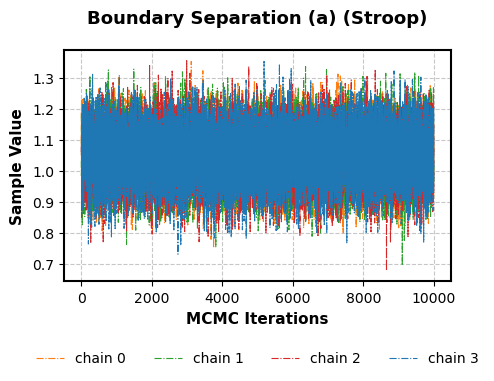

[Saved] Trace plot for 'a' -> 3.模型诊断-输出/m0Stroop/m0Stroop_a_trace_plot.jpg


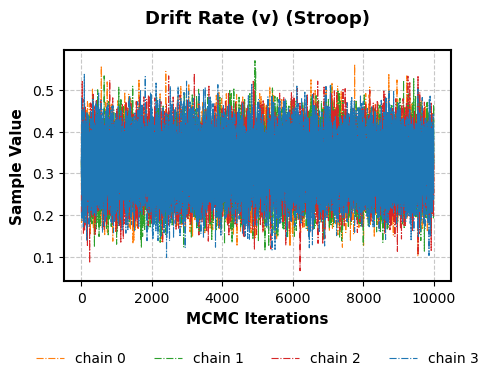

[Saved] Trace plot for 'v' -> 3.模型诊断-输出/m0Stroop/m0Stroop_v_trace_plot.jpg


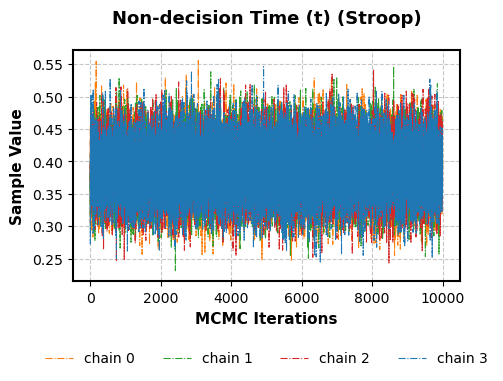

[Saved] Trace plot for 't' -> 3.模型诊断-输出/m0Stroop/m0Stroop_t_trace_plot.jpg


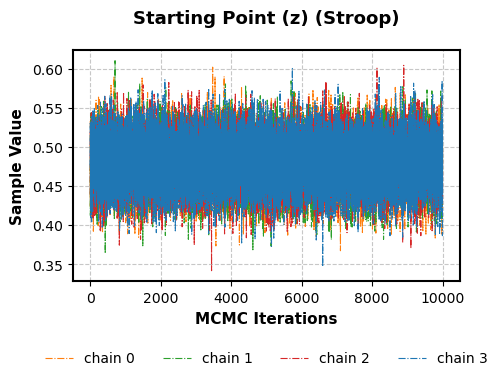

[Saved] Trace plot for 'z' -> 3.模型诊断-输出/m0Stroop/m0Stroop_z_trace_plot.jpg
[Info] m0Stroop 所有参数的模拟链显示良好混合与稳定。


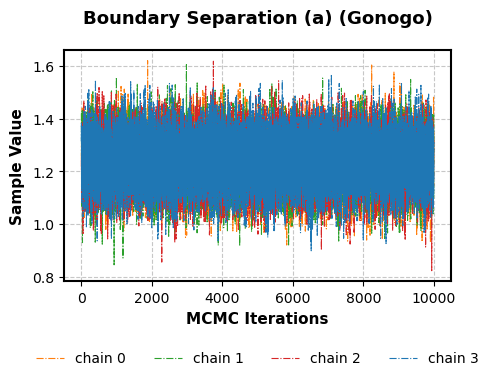

[Saved] Trace plot for 'a' -> 3.模型诊断-输出/m0Gonogo/m0Gonogo_a_trace_plot.jpg


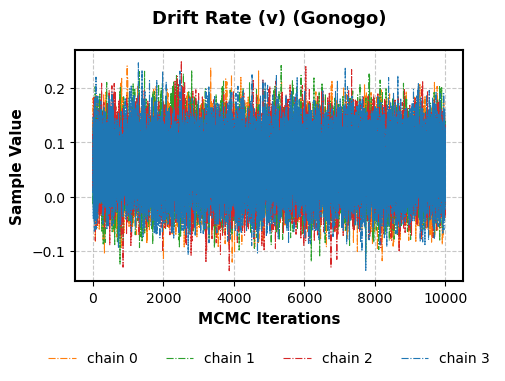

[Saved] Trace plot for 'v' -> 3.模型诊断-输出/m0Gonogo/m0Gonogo_v_trace_plot.jpg


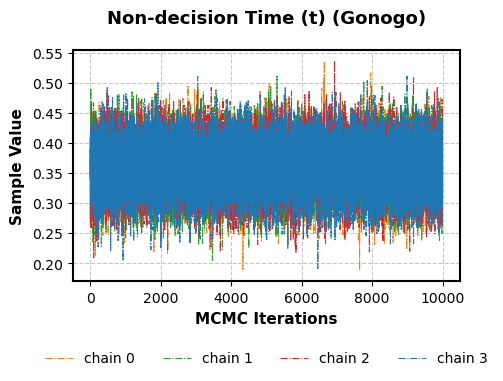

[Saved] Trace plot for 't' -> 3.模型诊断-输出/m0Gonogo/m0Gonogo_t_trace_plot.jpg


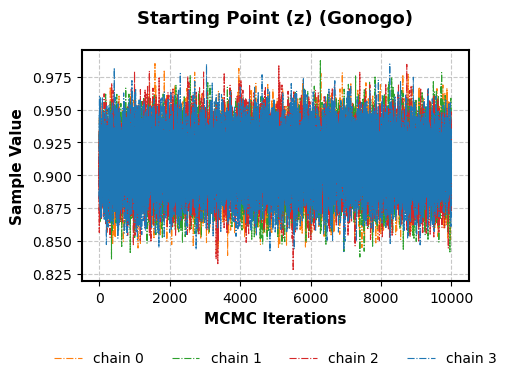

[Saved] Trace plot for 'z' -> 3.模型诊断-输出/m0Gonogo/m0Gonogo_z_trace_plot.jpg
[Info] m0Gonogo 所有参数的模拟链显示良好混合与稳定。


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import arviz as az  # 用于读取 InferenceData

# -----------------------------
# 1. 配置区
# -----------------------------
# 模型名称列表
model_names = ['m0Stroop', 'm0Gonogo']
# 定义需要绘制 Trace Plot 的参数
parameters = ['a', 'v', 't', 'z']
# 链颜色（最多支持 4 条链，你可以根据实际链数增减）
chain_colors = ['#ff7f0e', '#2ca02c', '#d62728', '#1f77b4']
# 参数更可读的说明
param_labels = {
    'a': 'Boundary Separation (a)',
    'v': 'Drift Rate (v)',
    't': 'Non-decision Time (t)',
    'z': 'Starting Point (z)'
}

# 创建基目录
output_base = '3.模型诊断-输出'
os.makedirs(output_base, exist_ok=True)

# -----------------------------
# 2. 生成 Trace Plot（真实读取 MCMC 链）
# -----------------------------
for model_name in model_names:
    # 推断数据文件路径（请根据实际保存位置调整）
    infdata_path = os.path.join('2.模型拟合-输出', f'{model_name}_infdata.pkl')
    if not os.path.exists(infdata_path):
        print(f"[Error] 找不到推断数据文件: {infdata_path}")
        continue

    # 加载 InferenceData 对象
    with open(infdata_path, 'rb') as f:
        idata = pickle.load(f)
    # 确保 posterior 部分存在
    if not hasattr(idata, 'posterior'):
        print(f"[Error] {model_name} 的 InferenceData 中不包含 posterior 部分，跳过。")
        continue

    # 准备输出子文件夹
    output_folder = os.path.join(output_base, model_name)
    os.makedirs(output_folder, exist_ok=True)

    for param in parameters:
        if param not in idata.posterior.data_vars:
            print(f"[Warning] 模型 {model_name} 未包含参数 '{param}'，跳过。")
            continue

        # 从 posterior 中提取各链样本
        # posterior[param] 的 dims 通常包含 'chain' 和 'draw'
        posterior = idata.posterior[param]
        n_chains = posterior.sizes.get('chain', 1)
        n_draws = posterior.sizes.get('draw', posterior.values.shape[-1])

        # 创建 Figure 和 Axes
        fig, ax = plt.subplots(figsize=(5, 3))
        fig.patch.set_alpha(0)
        ax.patch.set_alpha(0)

        # 绘制每一条链
        for idx in range(n_chains):
            # .sel(chain=idx) 选出第 idx 条链，.values 拉平成 (draw,) 数组
            samples = posterior.sel(chain=idx).values.flatten()
            ax.plot(
                samples,
                color=chain_colors[idx % len(chain_colors)],
                label=f'chain {idx}',
                linestyle='-',
                linewidth=0.8
            )

        # 设置坐标轴标签
        ax.set_xlabel('MCMC Iterations', fontsize=11, fontweight='bold', labelpad=5, color='black')
        ax.set_ylabel('Sample Value', fontsize=11, fontweight='bold', labelpad=5, color='black')

        # 设置标题
        label = param_labels.get(param, param)
        ax.set_title(
            f"{label} ({model_name.replace('m0', '')})",
            fontsize=13,
            fontweight='bold',
            y=1.08,
            color='black'
        )

        # 美化边框和网格
        for spine in ax.spines.values():
            spine.set_color('black')
            spine.set_linewidth(1.5)
        ax.grid(True, linestyle='--', alpha=0.7)

        # 图例外置
        ax.legend(
            fontsize=10,
            frameon=False,
            ncol=min(n_chains, 4),
            bbox_to_anchor=(0.5, -0.25),
            loc='upper center'
        )

        # 保存图像
        output_file = os.path.join(output_folder, f"{model_name}_{param}_trace_plot.jpg")
        plt.savefig(
            output_file,
            dpi=1200,
            format='jpg',
            bbox_inches='tight',
            transparent=True
        )
        plt.show()
        plt.close(fig)
        print(f"[Saved] Trace plot for '{param}' -> {output_file}")

    print(f"[Info] {model_name} 所有参数的真实 MCMC 链已绘制完毕。")

### （2）方法2. $\hat{R}$ and ESS

In [ ]:
import os
import pandas as pd
import arviz as az

# 确保输出文件夹存在
output_dir = "3.模型诊断-输出"
os.makedirs(output_dir, exist_ok=True)

# 要诊断的模型列表
model_names = ['m0Stroop', 'm0Gonogo', 'm1Stroop', 'm1Gonogo']
model_data = [m0Stroop_infdata, m0Gonogo_infdata, m1Stroop_infdata, m1Gonogo_infdata]

# 循环处理每个模型
for model_name, tmp_infdata in zip(model_names, model_data):
    # 获取所有参数的诊断汇总（包含 r_hat、ESS 等信息）
    summary_tmp = az.summary(tmp_infdata, kind="diagnostics", round_to=4)
    
    # 筛选出 R-hat 大于 1.1 的“收敛有问题”参数
    problem_params = summary_tmp[summary_tmp["r_hat"] > 1.1]
    
    # 打印并保存“收敛有问题”的参数
    print(f"问题参数😭 - {model_name}:")
    print(problem_params)
    problem_params.to_excel(
        os.path.join(output_dir, f"problem_params-{model_name}.xlsx"),
        index=True
    )
    print(f"已成功将问题参数保存至 problem_params-{model_name}.xlsx 文件")
    
    # 筛选出 R-hat 小于等于 1.1 的“收敛良好”参数
    good_params = summary_tmp[summary_tmp["r_hat"] <= 1.1]
    
    # 打印并保存“收敛良好”的参数
    print(f"收敛良好的参数😂 - {model_name}:")
    print(good_params)
    good_params.to_excel(
        os.path.join(output_dir, f"good_params-{model_name}.xlsx"),
        index=True
    )
    print(f"已成功将收敛良好的参数保存至 good_params-{model_name}.xlsx 文件")
    
    # 计算并打印模型的有效样本量（ESS）
    ess_dict = az.ess(tmp_infdata)
    print(f"模型 {model_name} 的 ESS：")
    print(ess_dict)

In [ ]:
import os
import pandas as pd
import arviz as az

# 确保输出文件夹存在
output_dir = "3.模型诊断-输出"
os.makedirs(output_dir, exist_ok=True)

# 要诊断的模型列表
model_names = ['m0Stroop', 'm0Gonogo', 'm1Stroop', 'm1Gonogo']
model_data = [m0Stroop_infdata, m0Gonogo_infdata, m1Stroop_infdata, m1Gonogo_infdata]
# 循环处理每个模型
for model_name, tmp_infdata in zip(model_names, model_data):
    # 获取所有参数的诊断统计量
    summary_tmp = az.summary(tmp_infdata, kind="diagnostics", round_to=4)
    
    # 打印所有参数的诊断统计量
    print(f"所有参数 - {model_name}:")
    print(summary_tmp)
    
    # 将所有参数保存为 Excel 文件
    summary_tmp.to_excel(
        os.path.join(output_dir, f"all_params-{model_name}.xlsx"),
        index=True
    )
    print(f"已成功将所有参数保存至 all_params-{model_name}.xlsx 文件")
    
    # 计算并打印有效样本量（ESS）
    ess_values = az.ess(tmp_infdata).to_dataframe().round(2)
    print(f"模型 {model_name} 的 ESS 值：")
    print(ess_values)

In [ ]:
%time
m0Stroop_infdata = m0Stroop.to_infdata(loglike = True, ppc = True, n_ppc = 500, save_name = "model_fitted/m0Stroop")

%time
m0Gonogo_infdata = m0Gonogo.to_infdata(loglike = True, ppc = True, n_ppc = 500, save_name = "model_fitted/m0Gonogo")

/opt/conda/lib/python3.9/site-packages/arviz/plots/ppcplot.py:268: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  flatten_pp = list(predictive_dataset.dims.keys())
/opt/conda/lib/python3.9/site-packages/arviz/plots/ppcplot.py:272: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  flatten = list(observed_data.dims.keys())


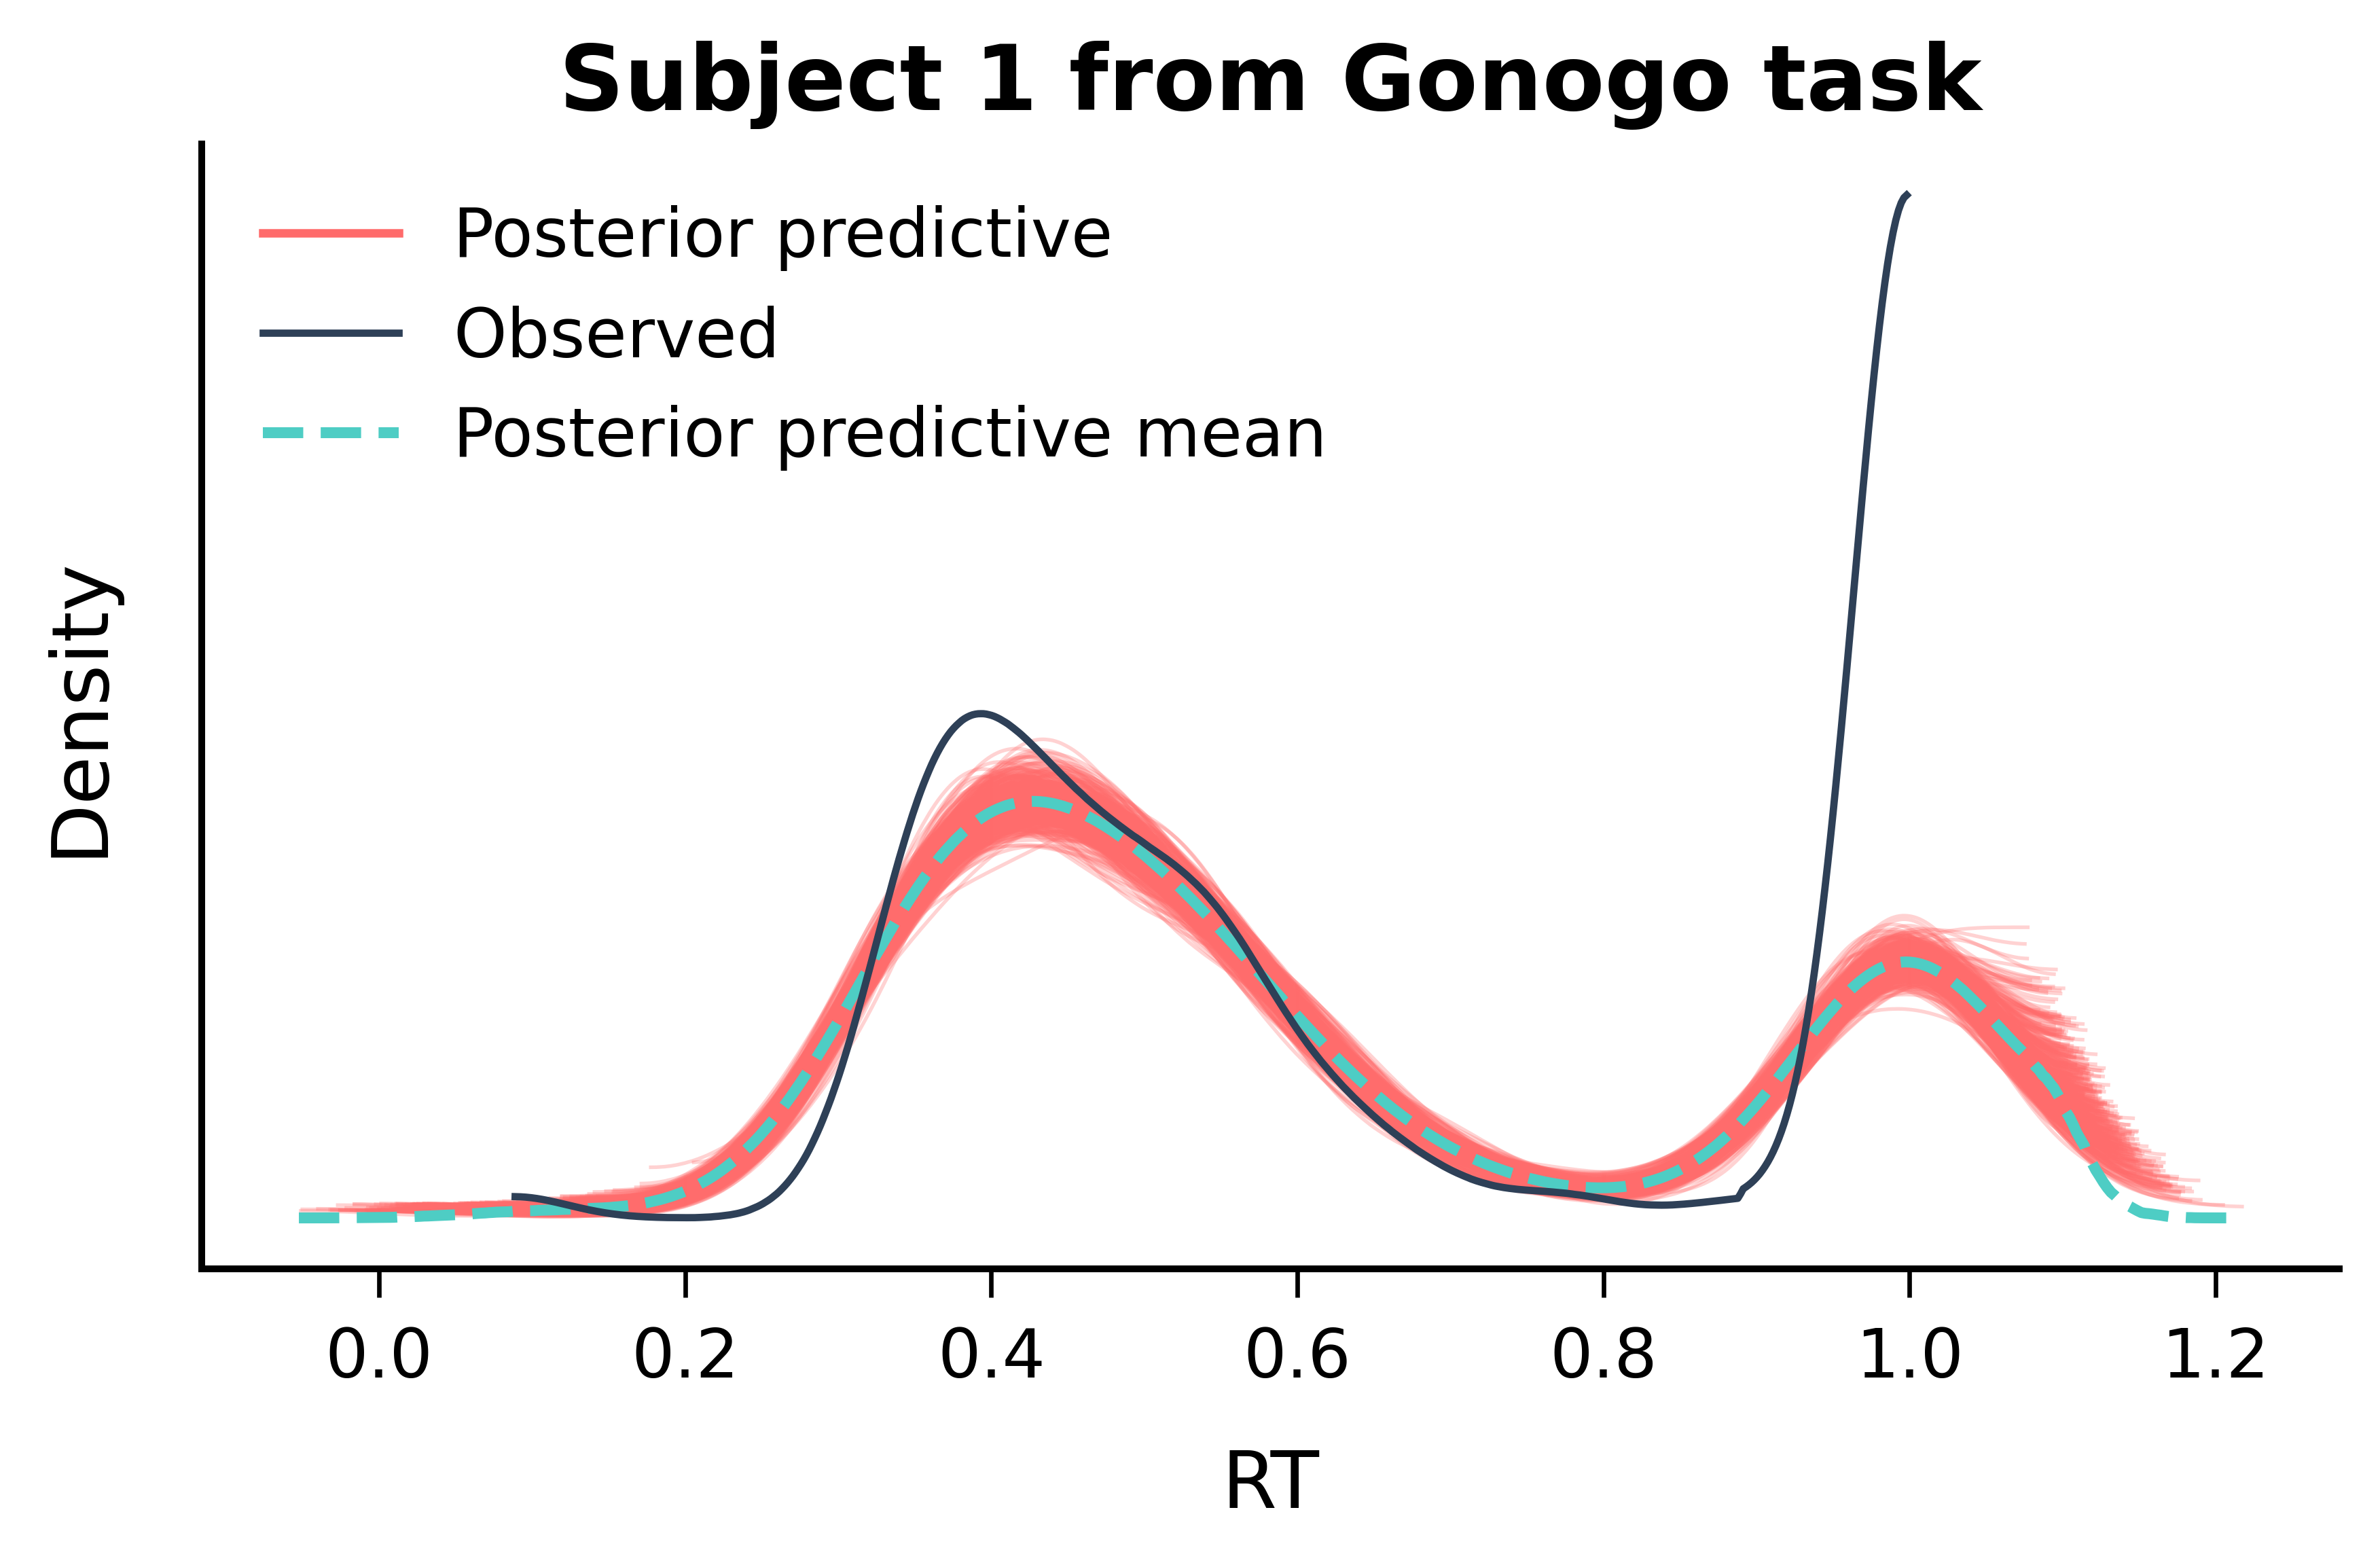

/opt/conda/lib/python3.9/site-packages/arviz/plots/ppcplot.py:268: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  flatten_pp = list(predictive_dataset.dims.keys())
/opt/conda/lib/python3.9/site-packages/arviz/plots/ppcplot.py:272: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  flatten = list(observed_data.dims.keys())


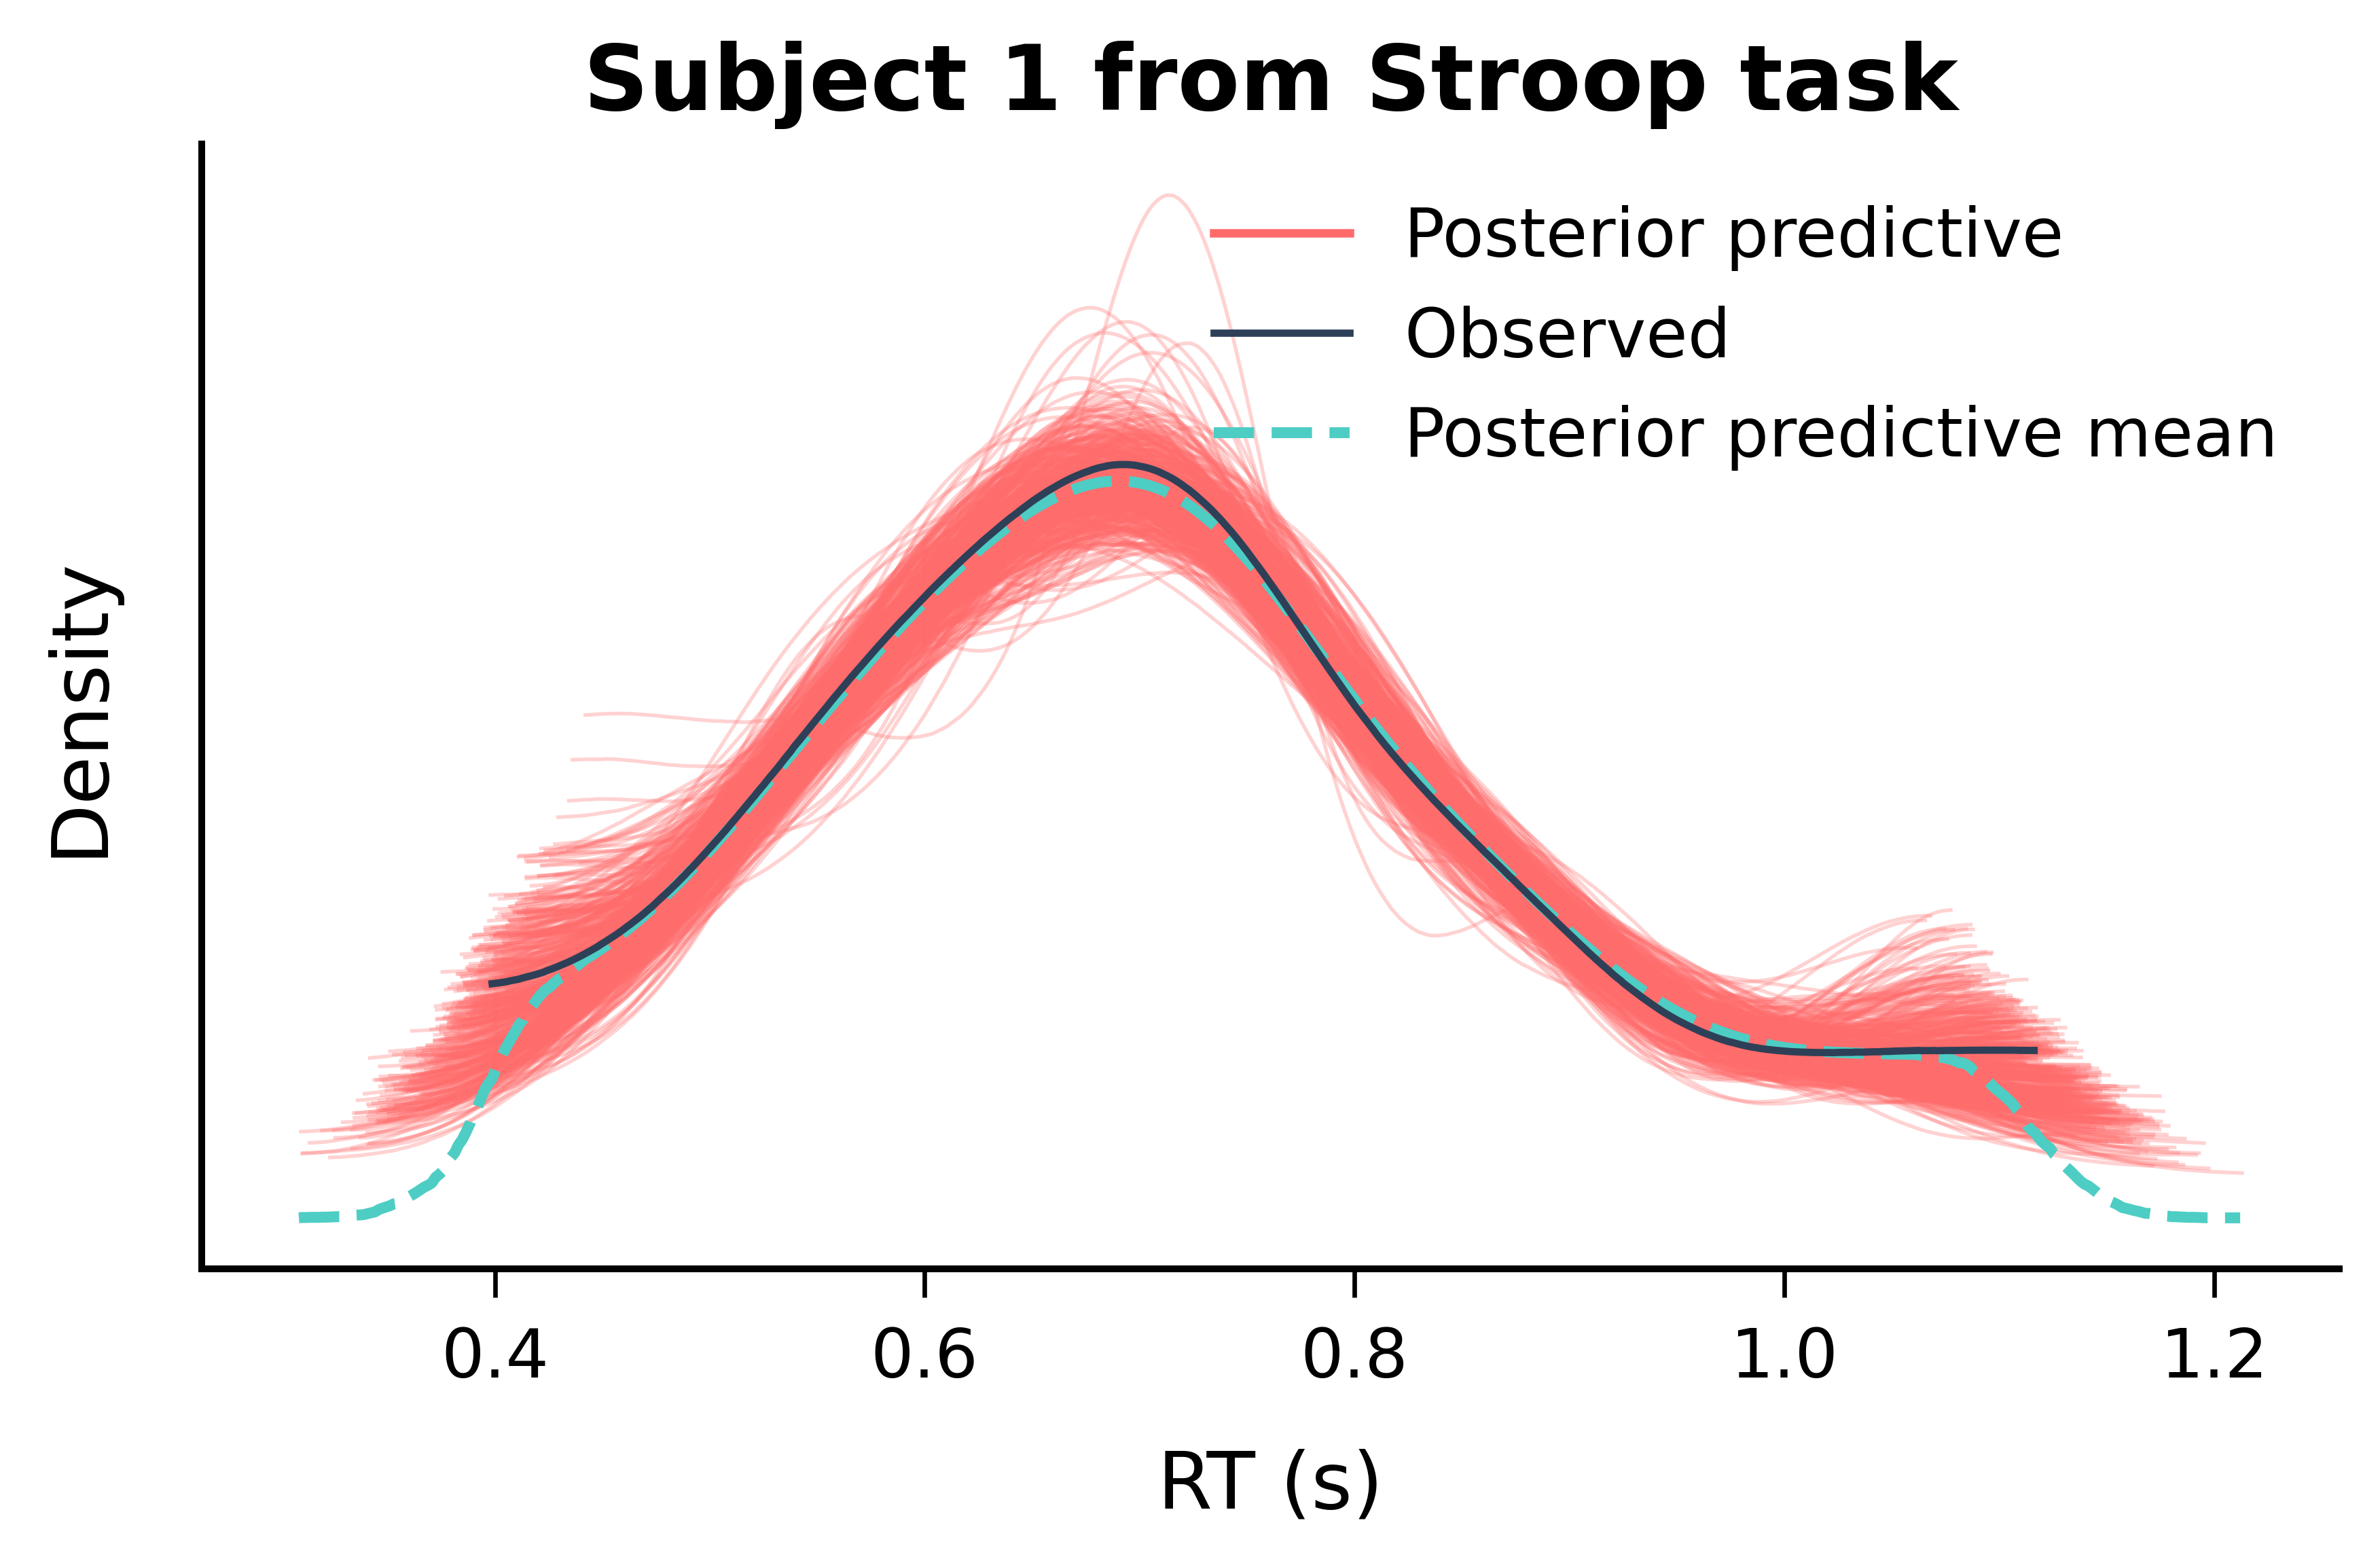

In [ ]:
import arviz as az
import matplotlib.pyplot as plt

# =========== 全局绘图设置 ===========
plt.rcParams['font.family']       = 'DejaVu Sans'
plt.rcParams['text.color']        = 'black'
plt.rcParams['axes.labelcolor']   = 'black'
plt.rcParams['xtick.color']       = 'black'
plt.rcParams['ytick.color']       = 'black'

PPC_COLORS     = ['#FF6B6B', '#2E4057', '#4ECDC4']
NUM_PP_SAMPLES = 500
RANDOM_SEED    = 42
ALPHA_PPC      = 0.3
FIG_SIZE       = (6, 4)
DPI            = 600

# ======== Go/No-Go PPC =========
# 直接读取之前保存的 InferenceData（to_infdata save_name="model_fitted/m0Gonogo"）
idata_gonogo = az.open_data("model_fitted/m0Gonogo")

fig, ax = plt.subplots(figsize=FIG_SIZE)
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

az.plot_ppc(
    data=idata_gonogo,
    var_names=['rt_gonogo'],
    num_pp_samples=NUM_PP_SAMPLES,
    random_seed=RANDOM_SEED,
    textsize=12,
    alpha=ALPHA_PPC,
    colors=PPC_COLORS,
    ax=ax,
    kind='kde'
)

ax.legend(frameon=False, fontsize=12)
ax.set_title("Go/No-Go PPC", fontsize=16, fontweight='bold', color='black')
ax.set_xlabel("RT (s)", fontsize=14, color='black')
ax.set_ylabel("Density", fontsize=14, color='black')
ax.tick_params(colors='black')

plt.tight_layout()
plt.savefig("gonogo_ppc.png", dpi=DPI, bbox_inches='tight', transparent=True)
plt.show()


# ======== Stroop PPC =========
# 直接读取之前保存的 InferenceData（to_infdata save_name="model_fitted/m0Stroop"）
idata_stroop = az.open_data("model_fitted/m0Stroop")

fig, ax = plt.subplots(figsize=FIG_SIZE)
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

az.plot_ppc(
    data=idata_stroop,
    var_names=['rt_stroop'],
    num_pp_samples=NUM_PP_SAMPLES,
    random_seed=RANDOM_SEED,
    textsize=12,
    alpha=ALPHA_PPC,
    colors=PPC_COLORS,
    ax=ax,
    kind='kde'
)

ax.legend(frameon=False, fontsize=12)
ax.set_title("Stroop PPC", fontsize=16, fontweight='bold', color='black')
ax.set_xlabel("RT (s)", fontsize=14, color='black')
ax.set_ylabel("Density", fontsize=14, color='black')
ax.tick_params(colors='black')

plt.tight_layout()
plt.savefig("stroop_ppc.png", dpi=DPI, bbox_inches='tight', transparent=True)
plt.show()

/opt/conda/lib/python3.9/site-packages/arviz/plots/ppcplot.py:268: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  flatten_pp = list(predictive_dataset.dims.keys())
/opt/conda/lib/python3.9/site-packages/arviz/plots/ppcplot.py:272: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  flatten = list(observed_data.dims.keys())


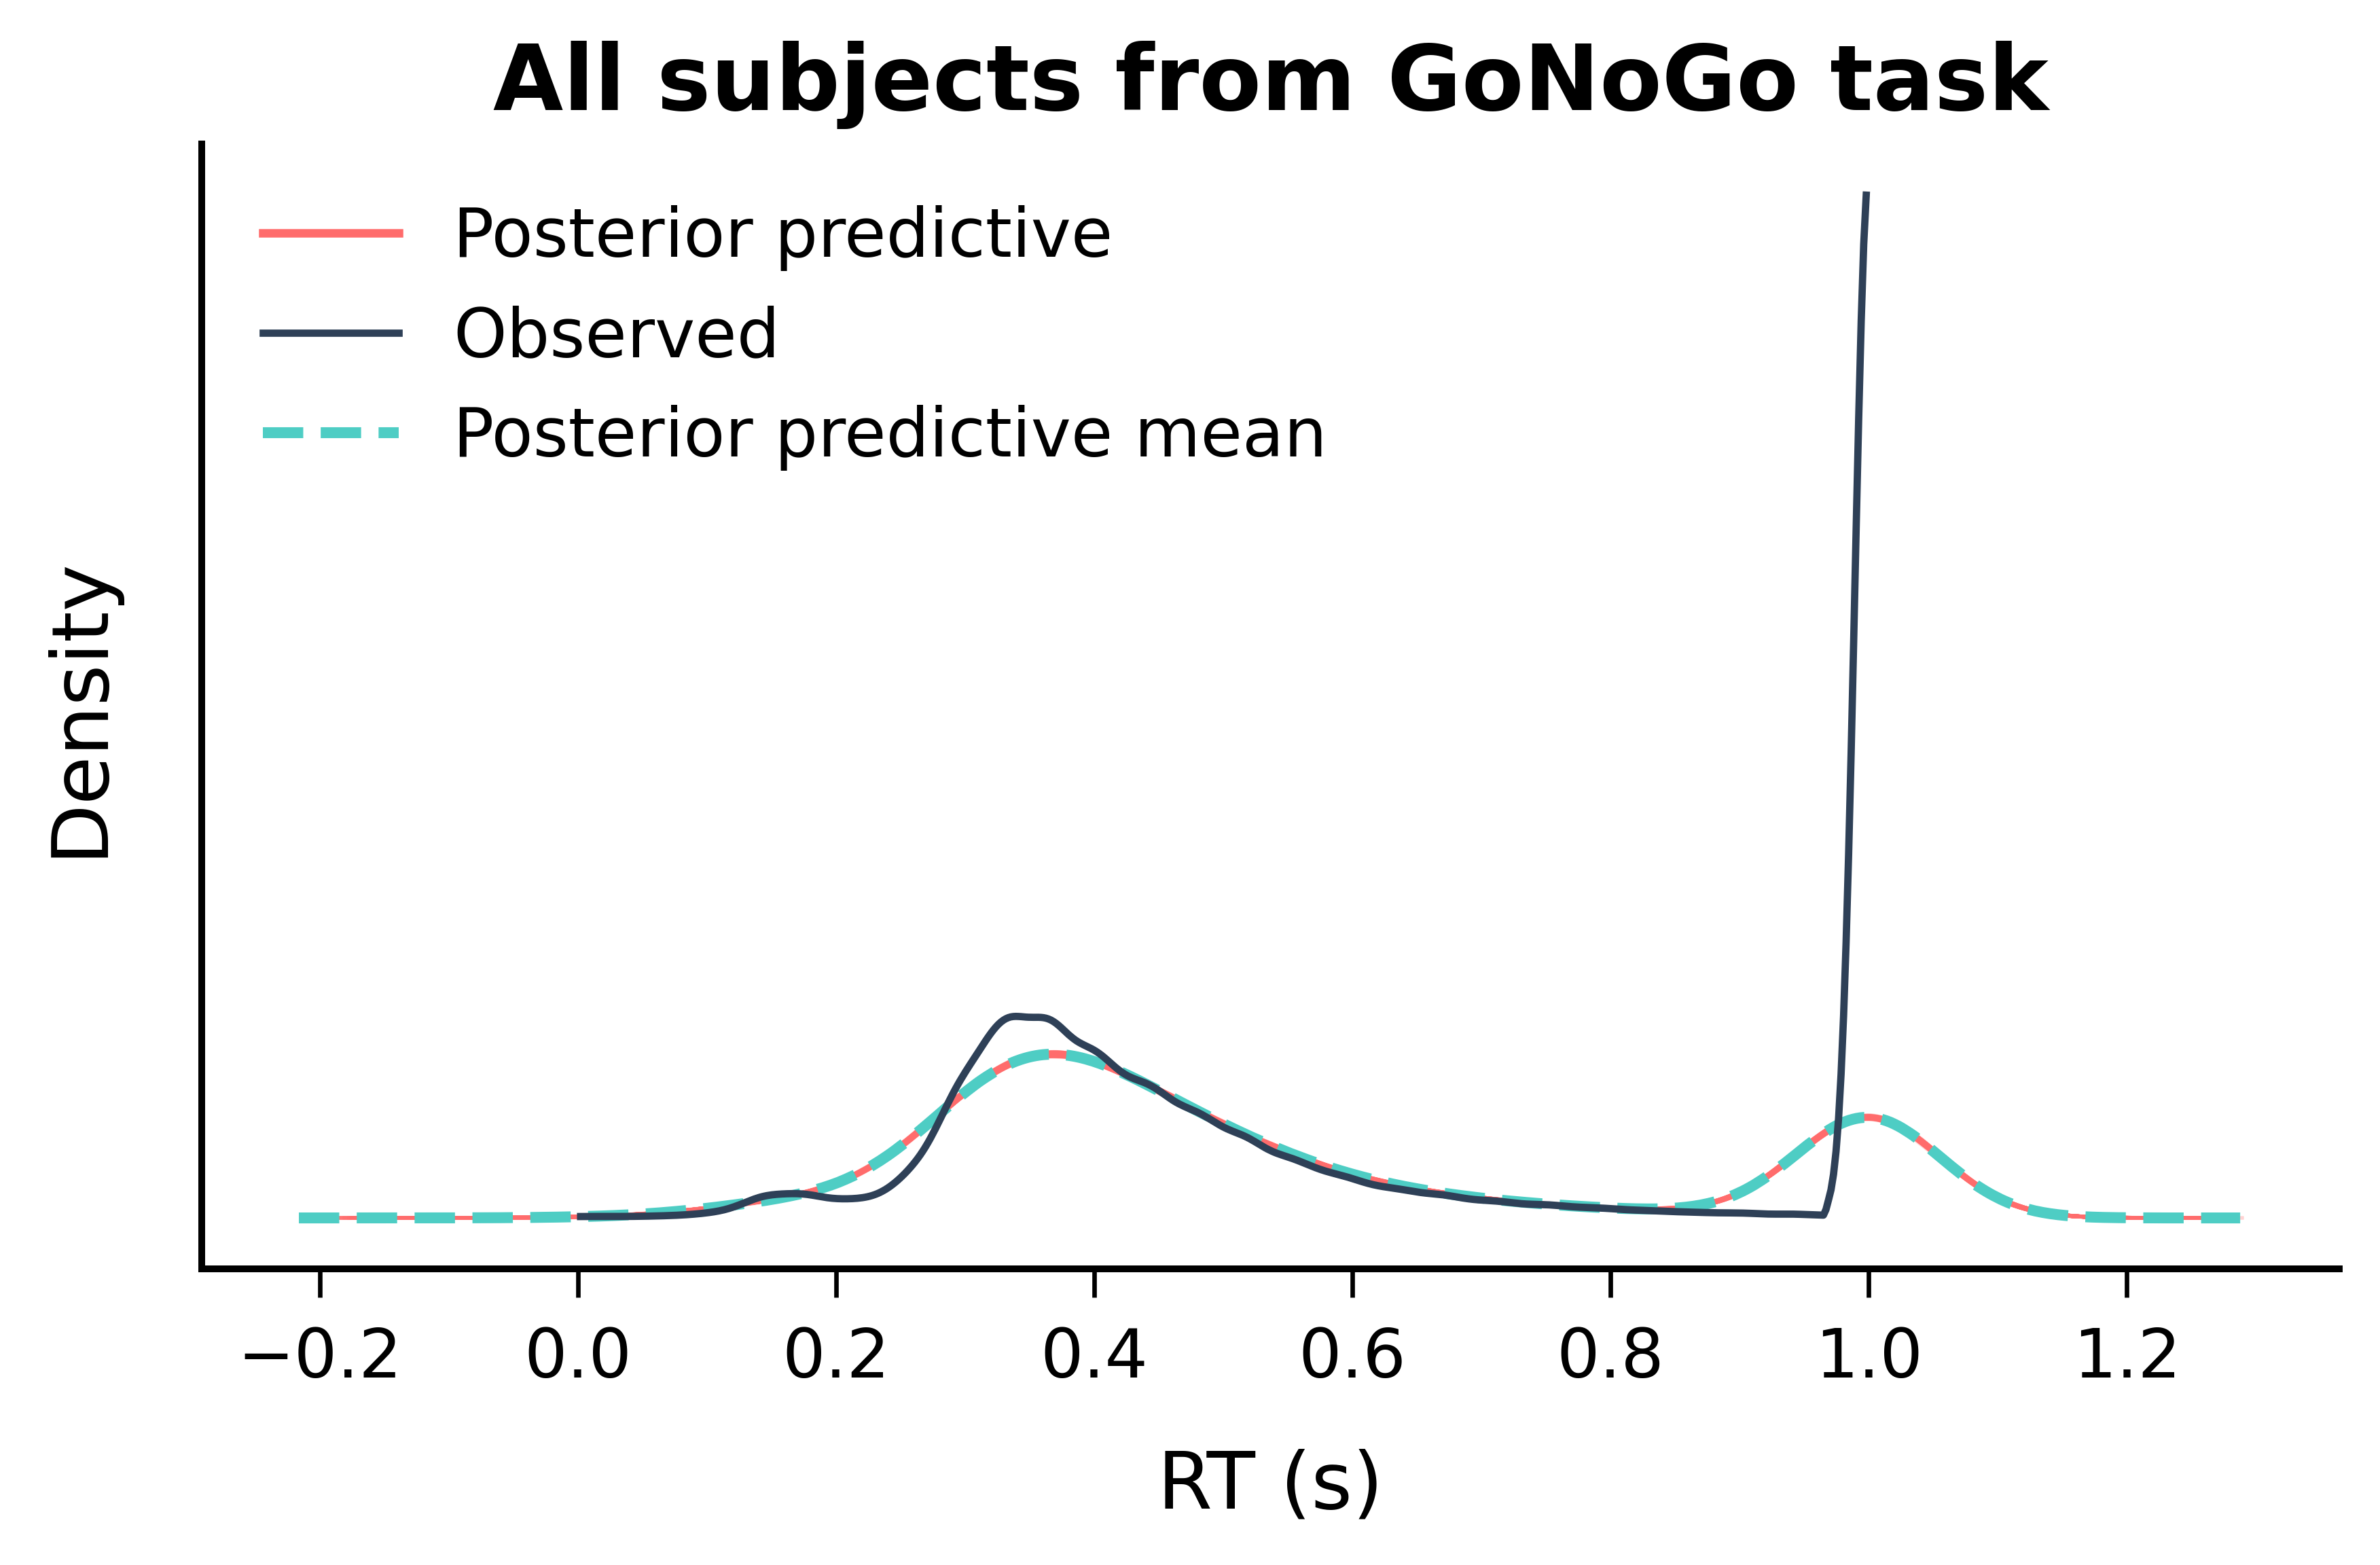

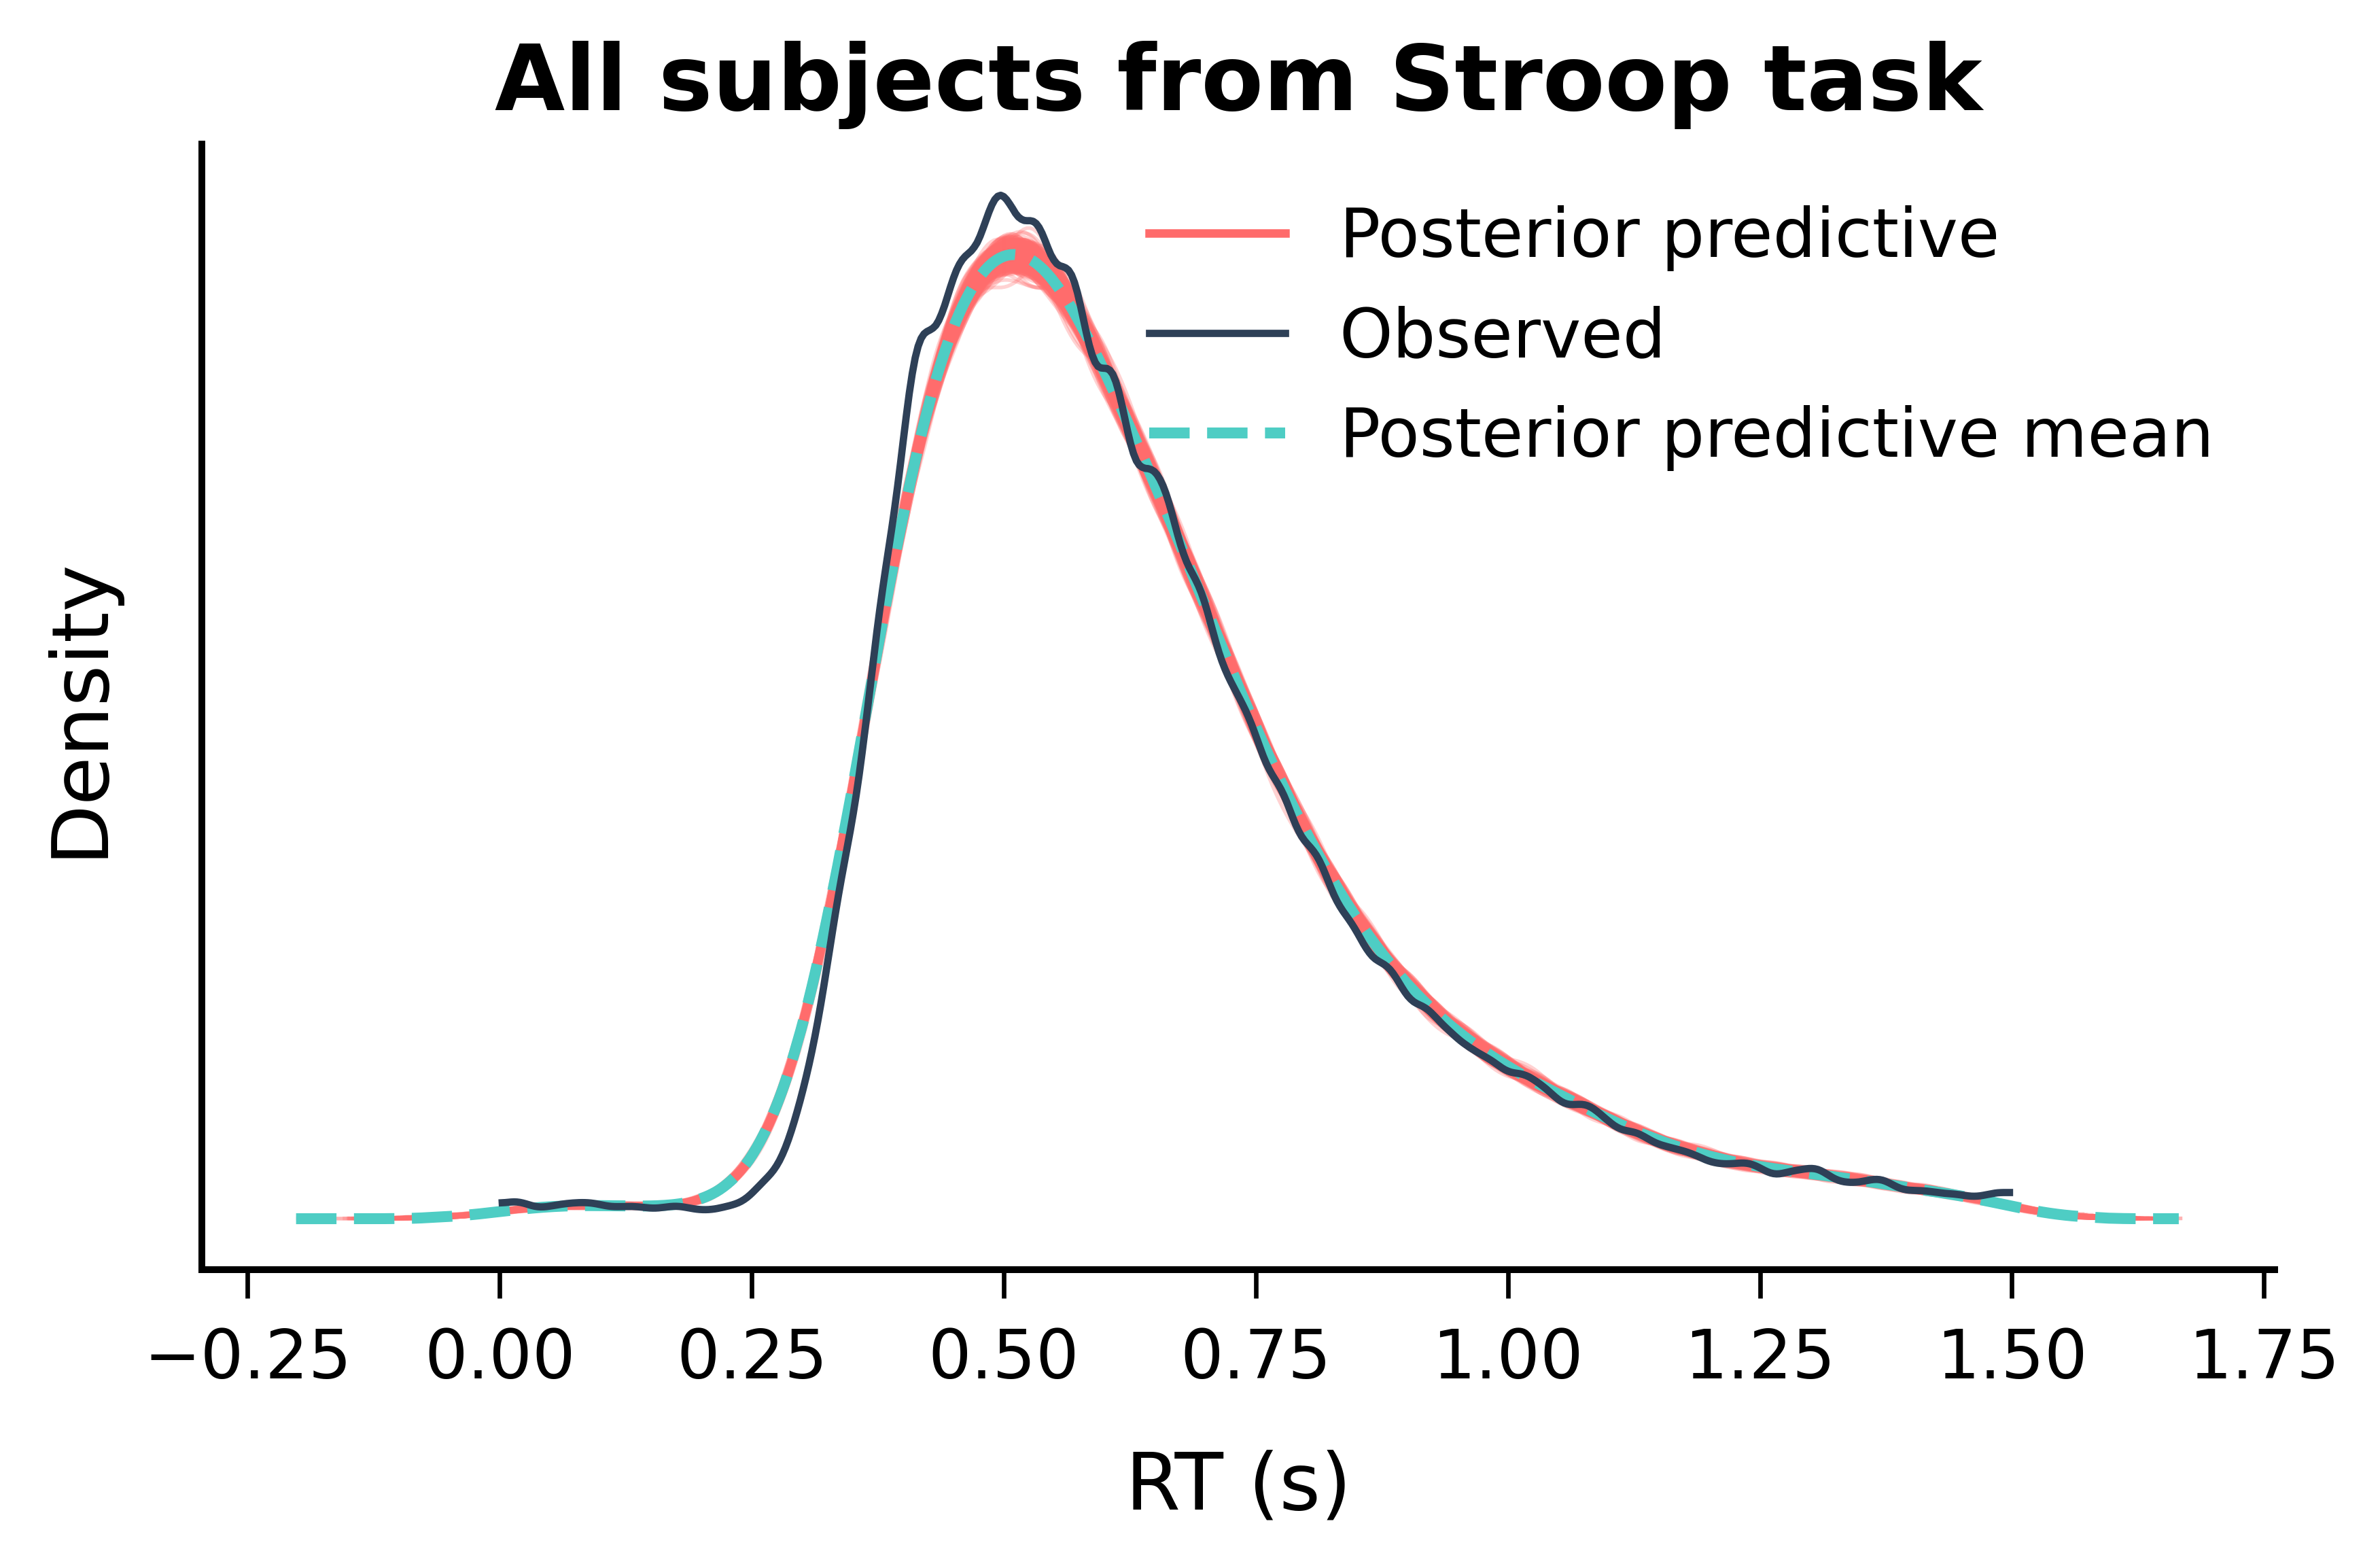

In [ ]:
import arviz as az
import matplotlib.pyplot as plt

# 全局绘图风格
plt.rcParams['font.family']     = 'DejaVu Sans'
plt.rcParams['text.color']      = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color']     = 'black'
plt.rcParams['ytick.color']     = 'black'

# PPC 绘图设置
ppc_colors     = ['#FF6B6B', '#2E4057', '#4ECDC4']
num_pp_samples = 500
random_seed    = 42
alpha_ppc      = 0.3
figsize        = (6, 4)
dpi            = 600

# ======== Stroop PPC =========
idata_stroop = az.open_data("model_fitted/m0Stroop")

fig, ax = plt.subplots(figsize=figsize)
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

az.plot_ppc(
    data=idata_stroop,
    var_names=['rt_stroop'],
    num_pp_samples=num_pp_samples,
    random_seed=random_seed,
    textsize=12,
    alpha=alpha_ppc,
    colors=ppc_colors,
    ax=ax,
    kind='kde'
)

ax.legend(frameon=False, fontsize=12)
ax.set_title("All subjects: Stroop PPC", fontsize=16, fontweight='bold', color='black')
ax.set_xlabel("RT (s)", fontsize=14, color='black')
ax.set_ylabel("Density", fontsize=14, color='black')
ax.tick_params(colors='black')

plt.tight_layout()
plt.savefig("stroop_ppc_all.png", dpi=dpi, bbox_inches='tight', transparent=True)
plt.show()


# ======== Go/No-Go PPC =========
idata_gonogo = az.open_data("model_fitted/m0Gonogo")

fig, ax = plt.subplots(figsize=figsize)
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

az.plot_ppc(
    data=idata_gonogo,
    var_names=['rt_gonogo'],
    num_pp_samples=num_pp_samples,
    random_seed=random_seed,
    textsize=12,
    alpha=alpha_ppc,
    colors=ppc_colors,
    ax=ax,
    kind='kde'
)

ax.legend(frameon=False, fontsize=12)
ax.set_title("All subjects: Go/No-Go PPC", fontsize=16, fontweight='bold', color='black')
ax.set_xlabel("RT (s)", fontsize=14, color='black')
ax.set_ylabel("Density", fontsize=14, color='black')
ax.tick_params(colors='black')

plt.tight_layout()
plt.savefig("gonogo_ppc_all.png", dpi=dpi, bbox_inches='tight', transparent=True)
plt.show()

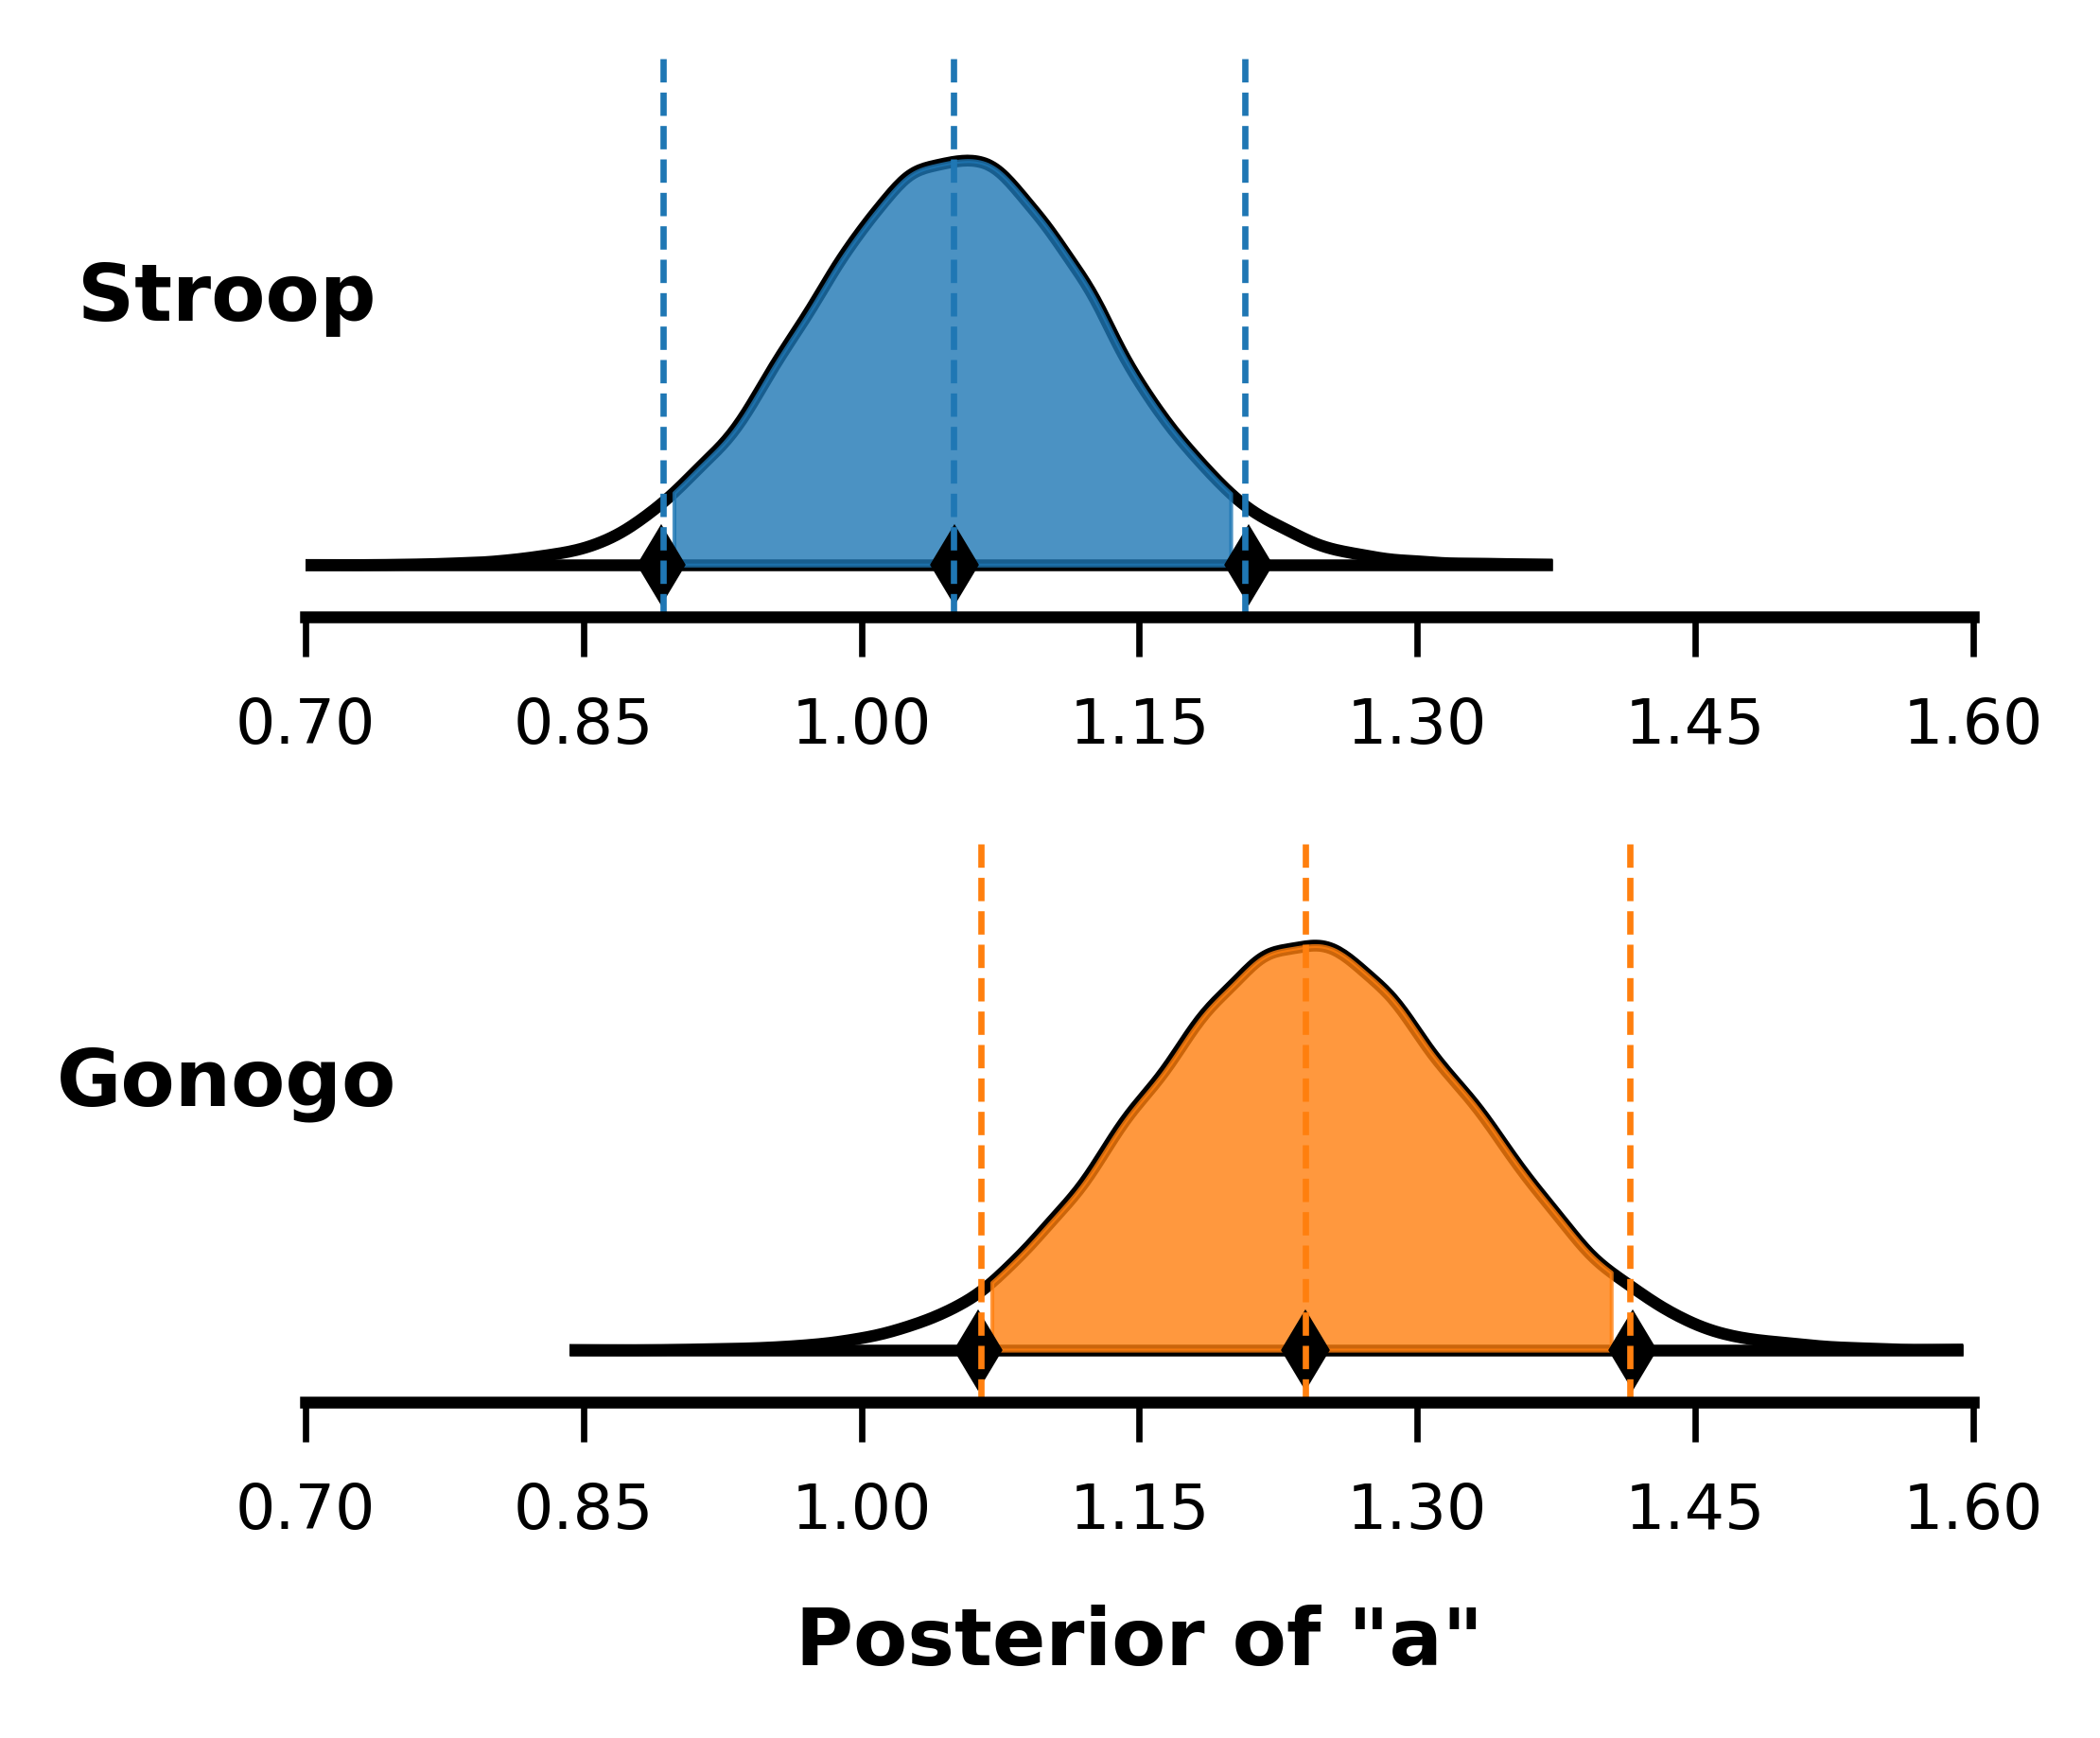

Saved figure: 6.统计推断-输出/m0/ridgeplot_comparison_a.jpg


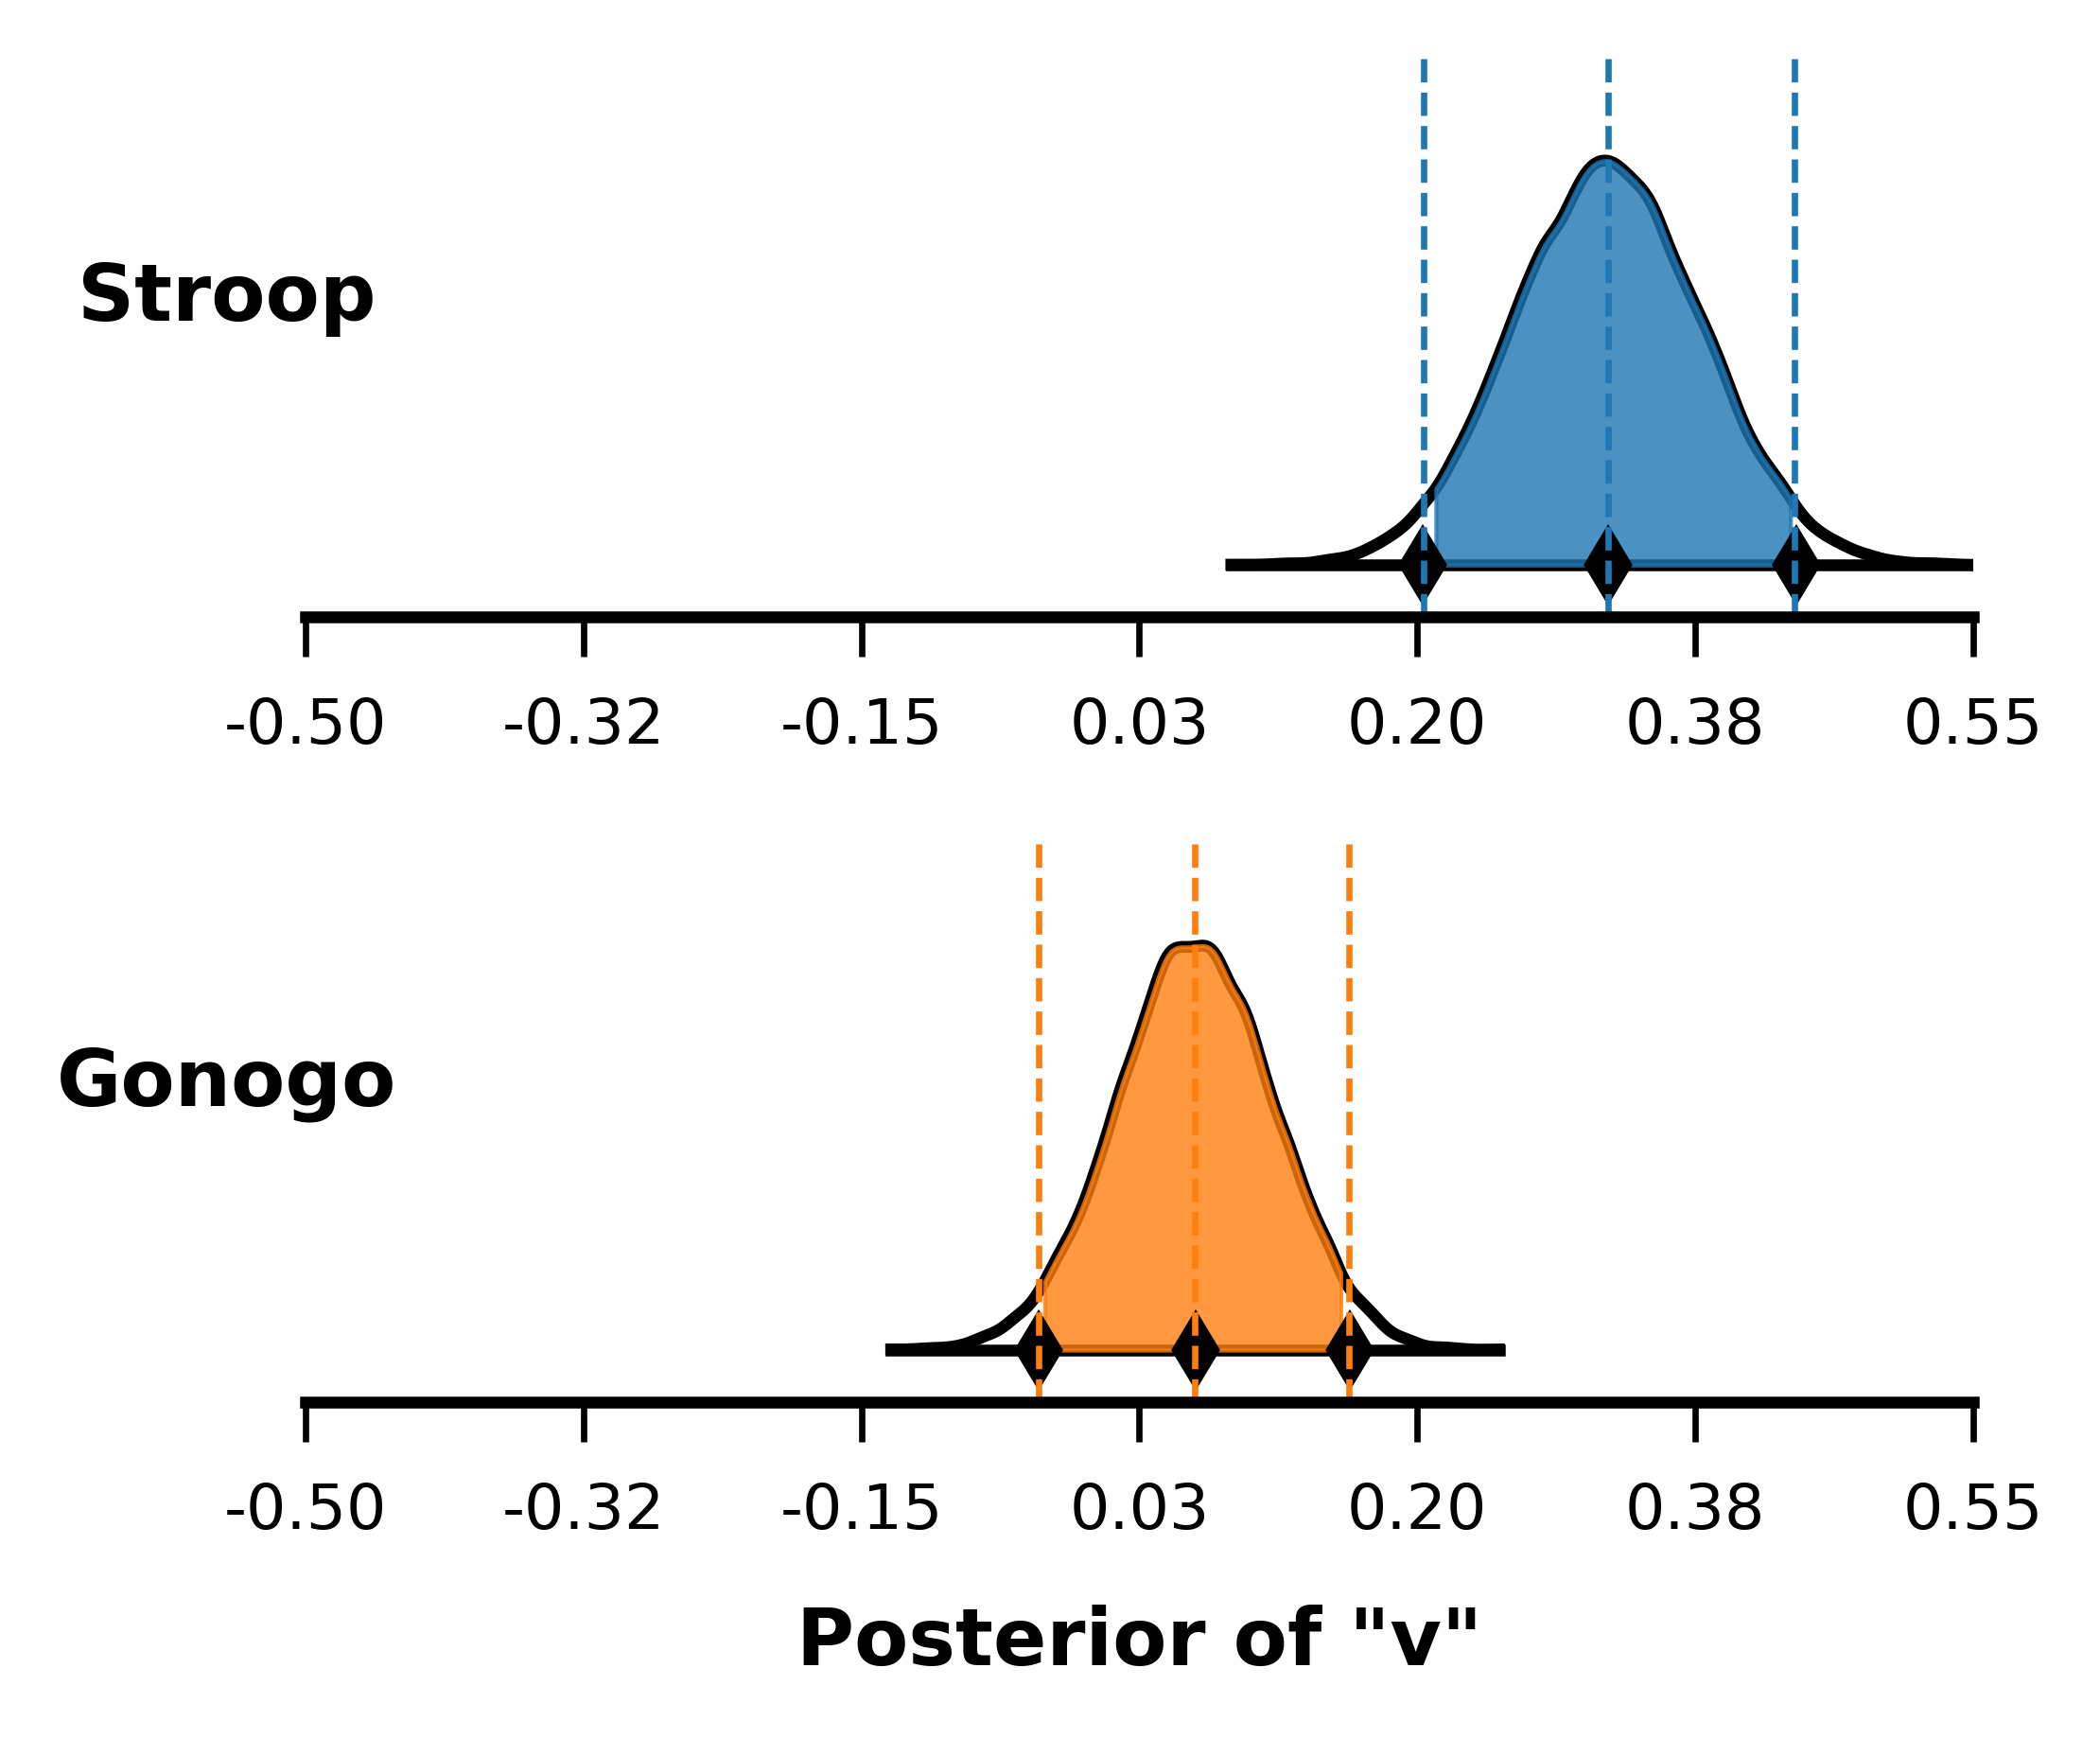

Saved figure: 6.统计推断-输出/m0/ridgeplot_comparison_v.jpg


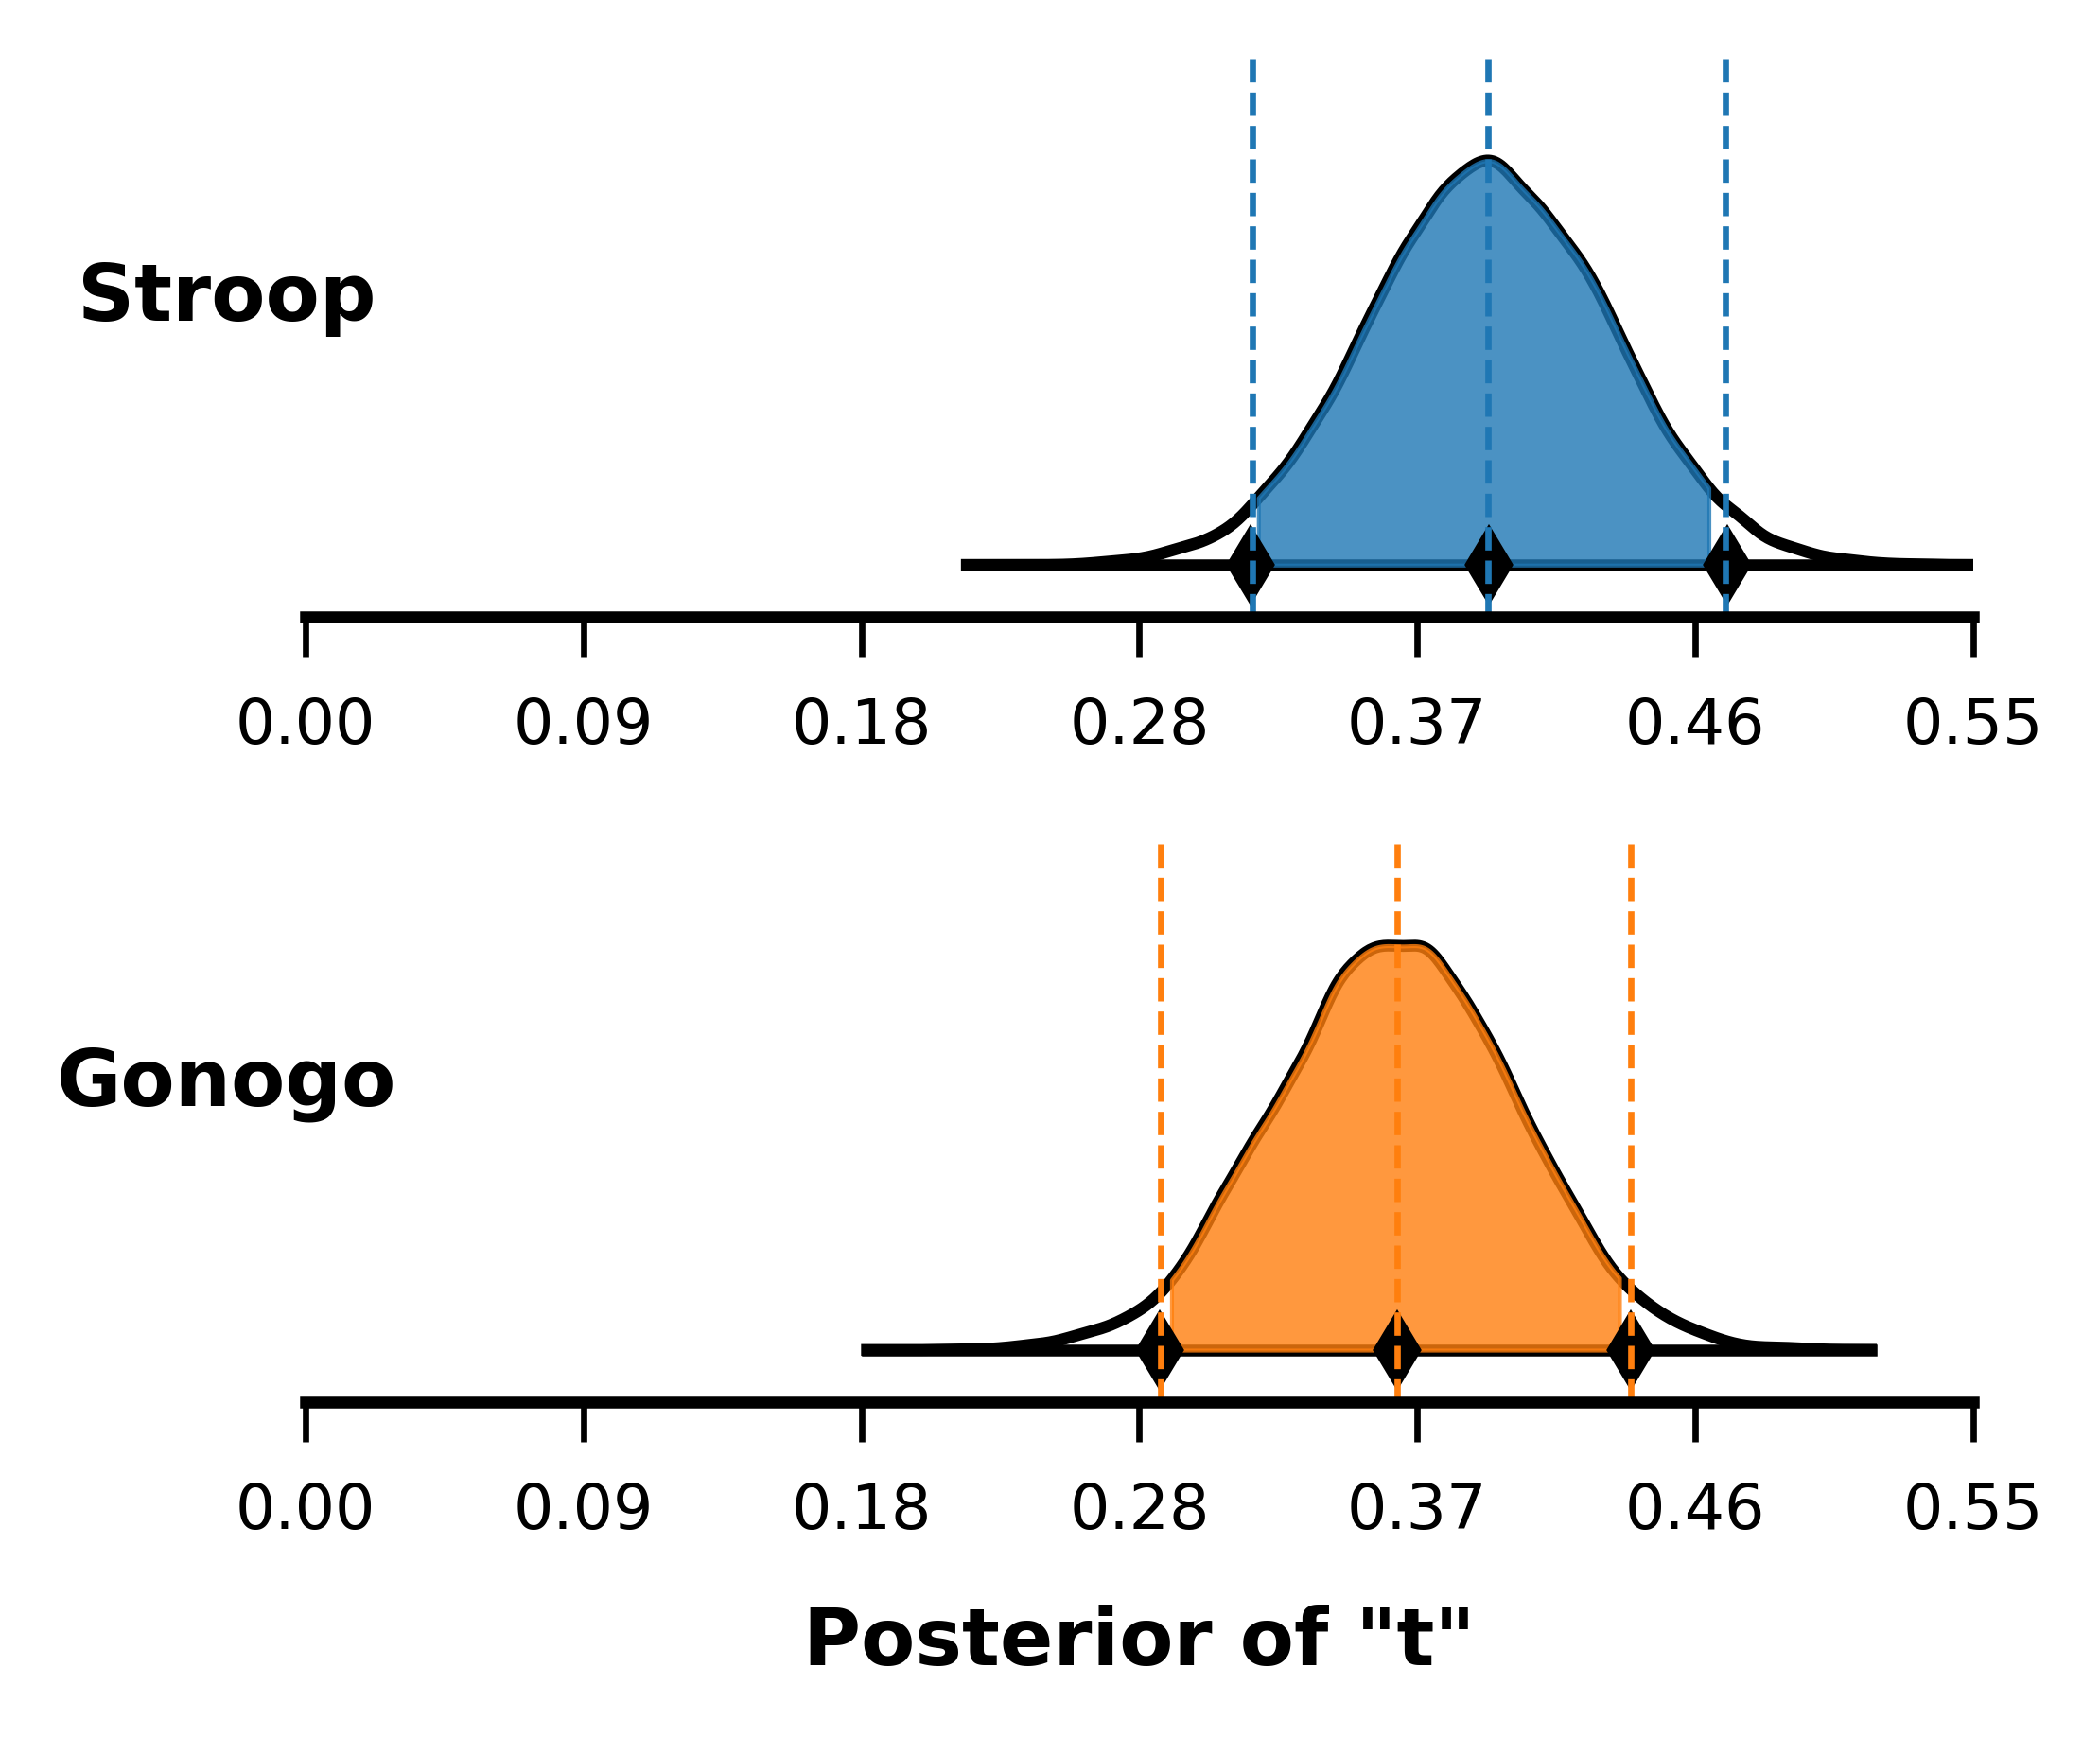

Saved figure: 6.统计推断-输出/m0/ridgeplot_comparison_t.jpg


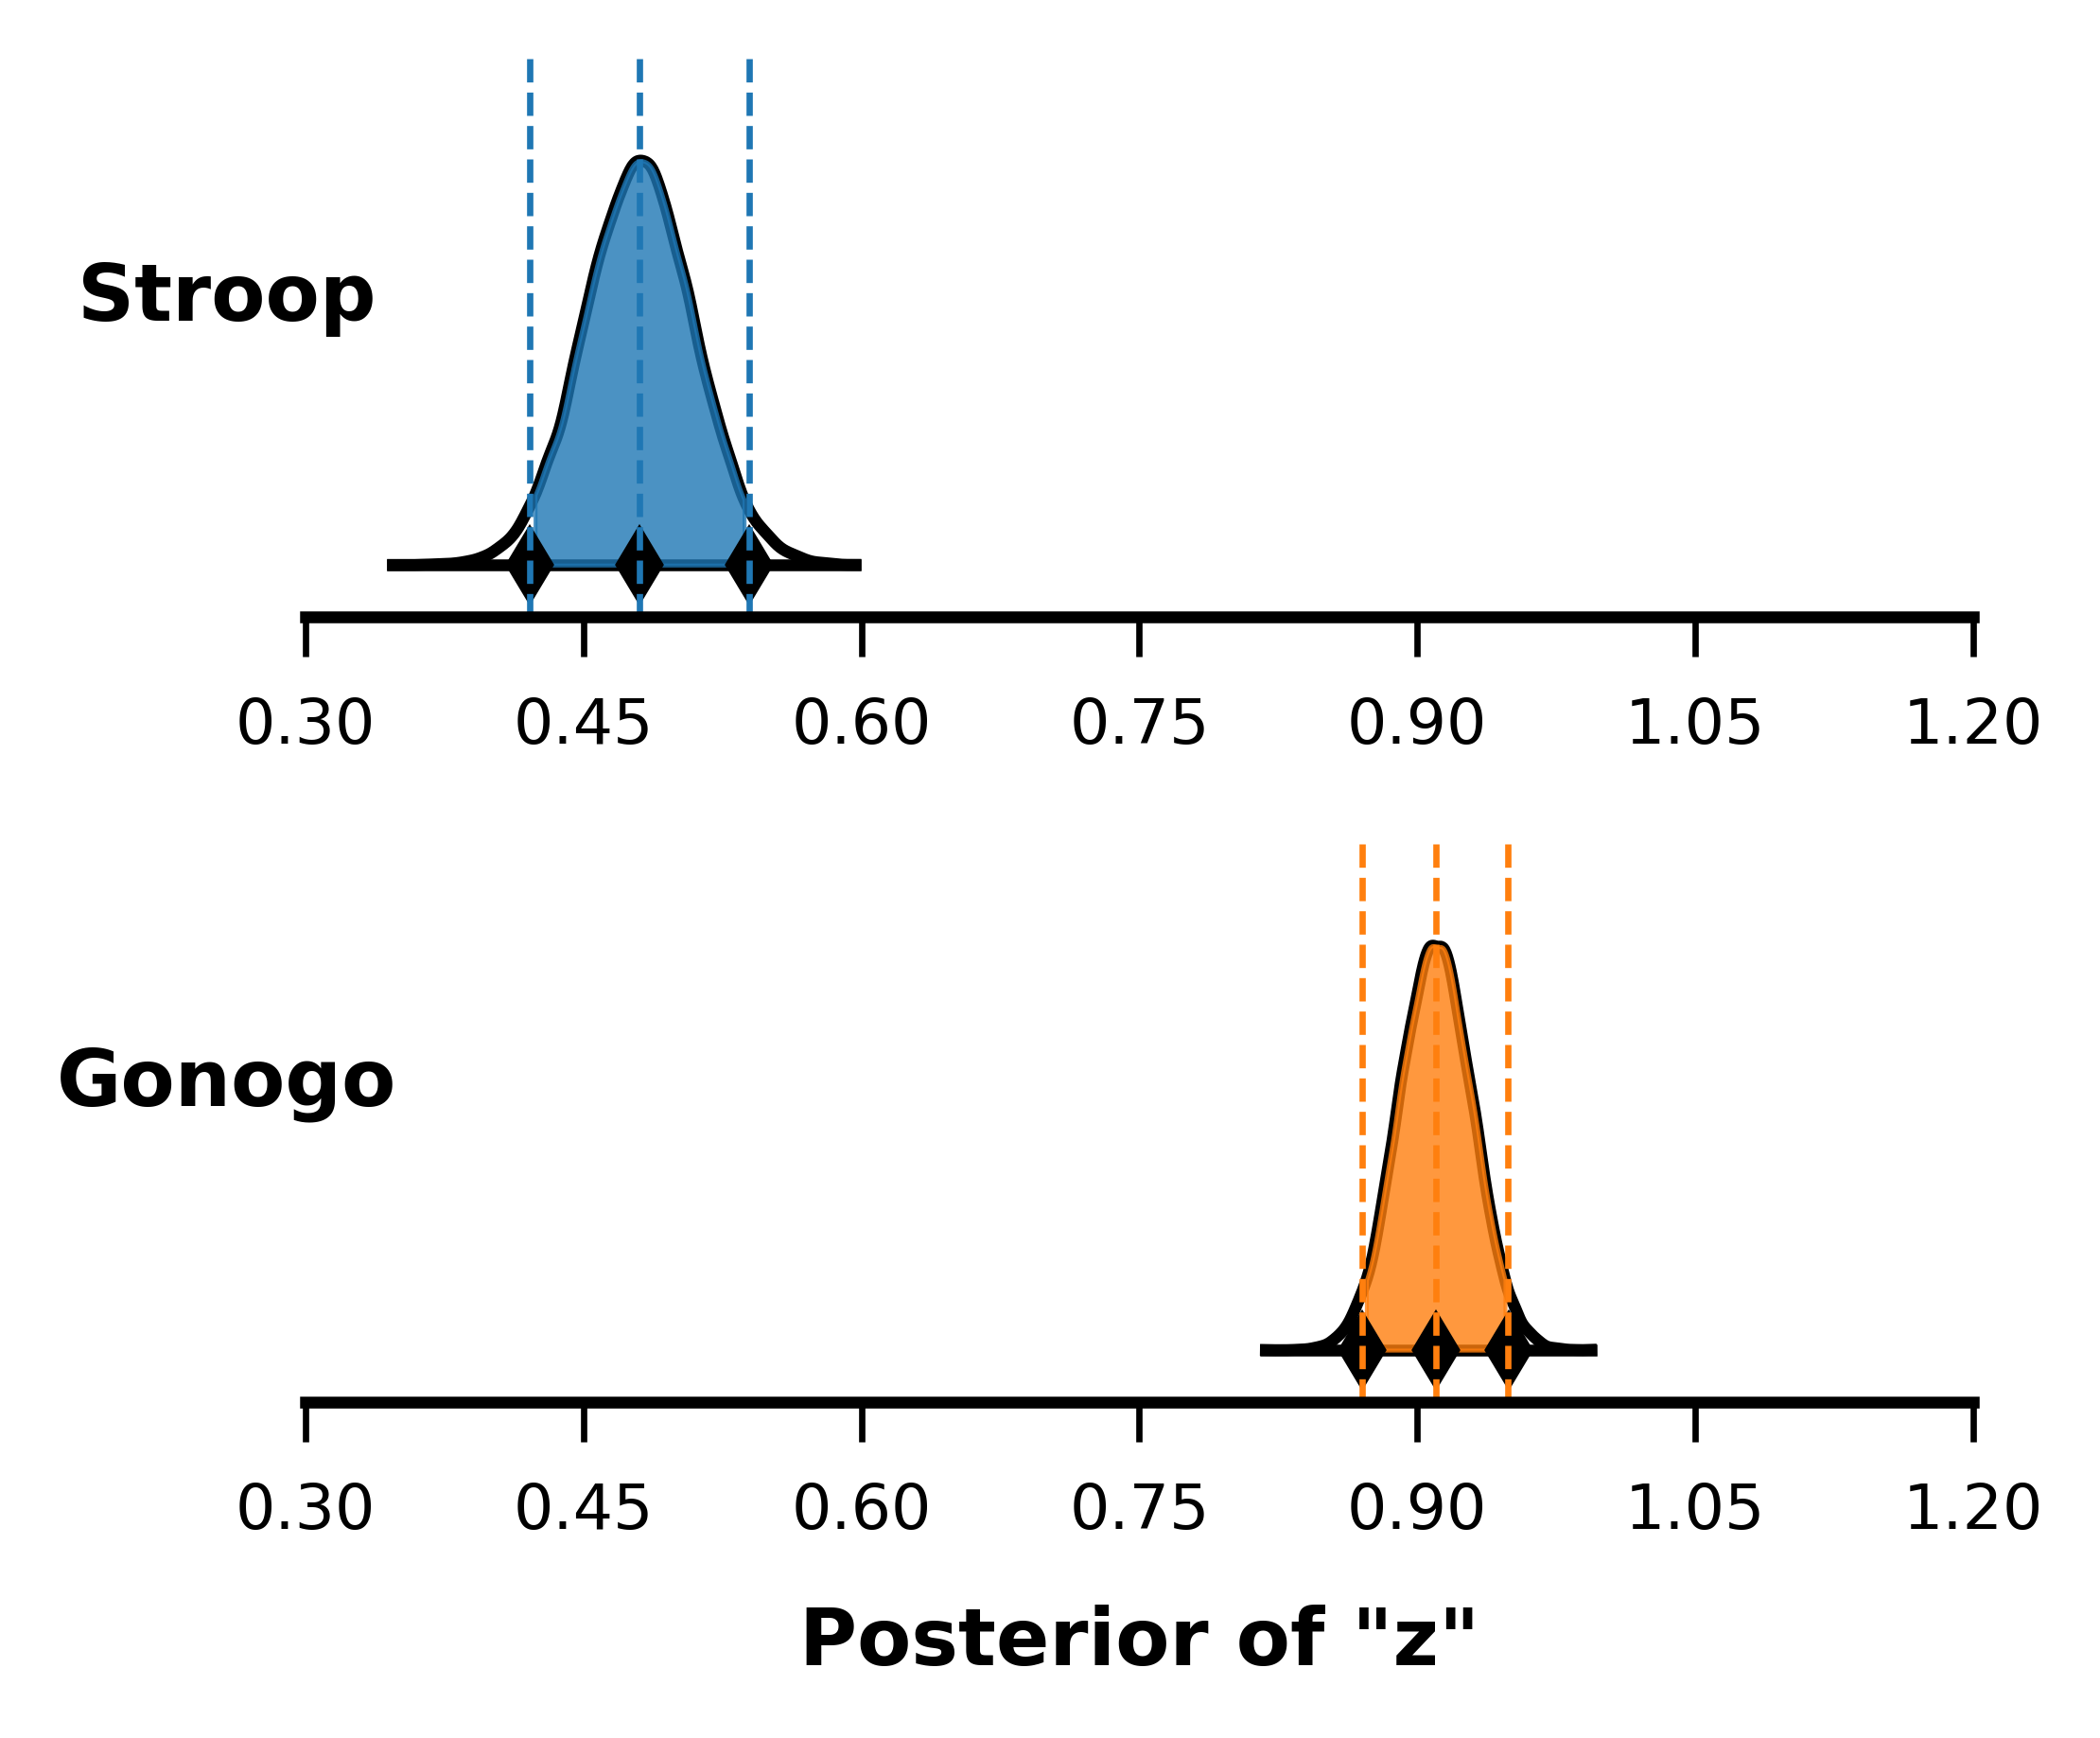

Saved figure: 6.统计推断-输出/m0/ridgeplot_comparison_z.jpg


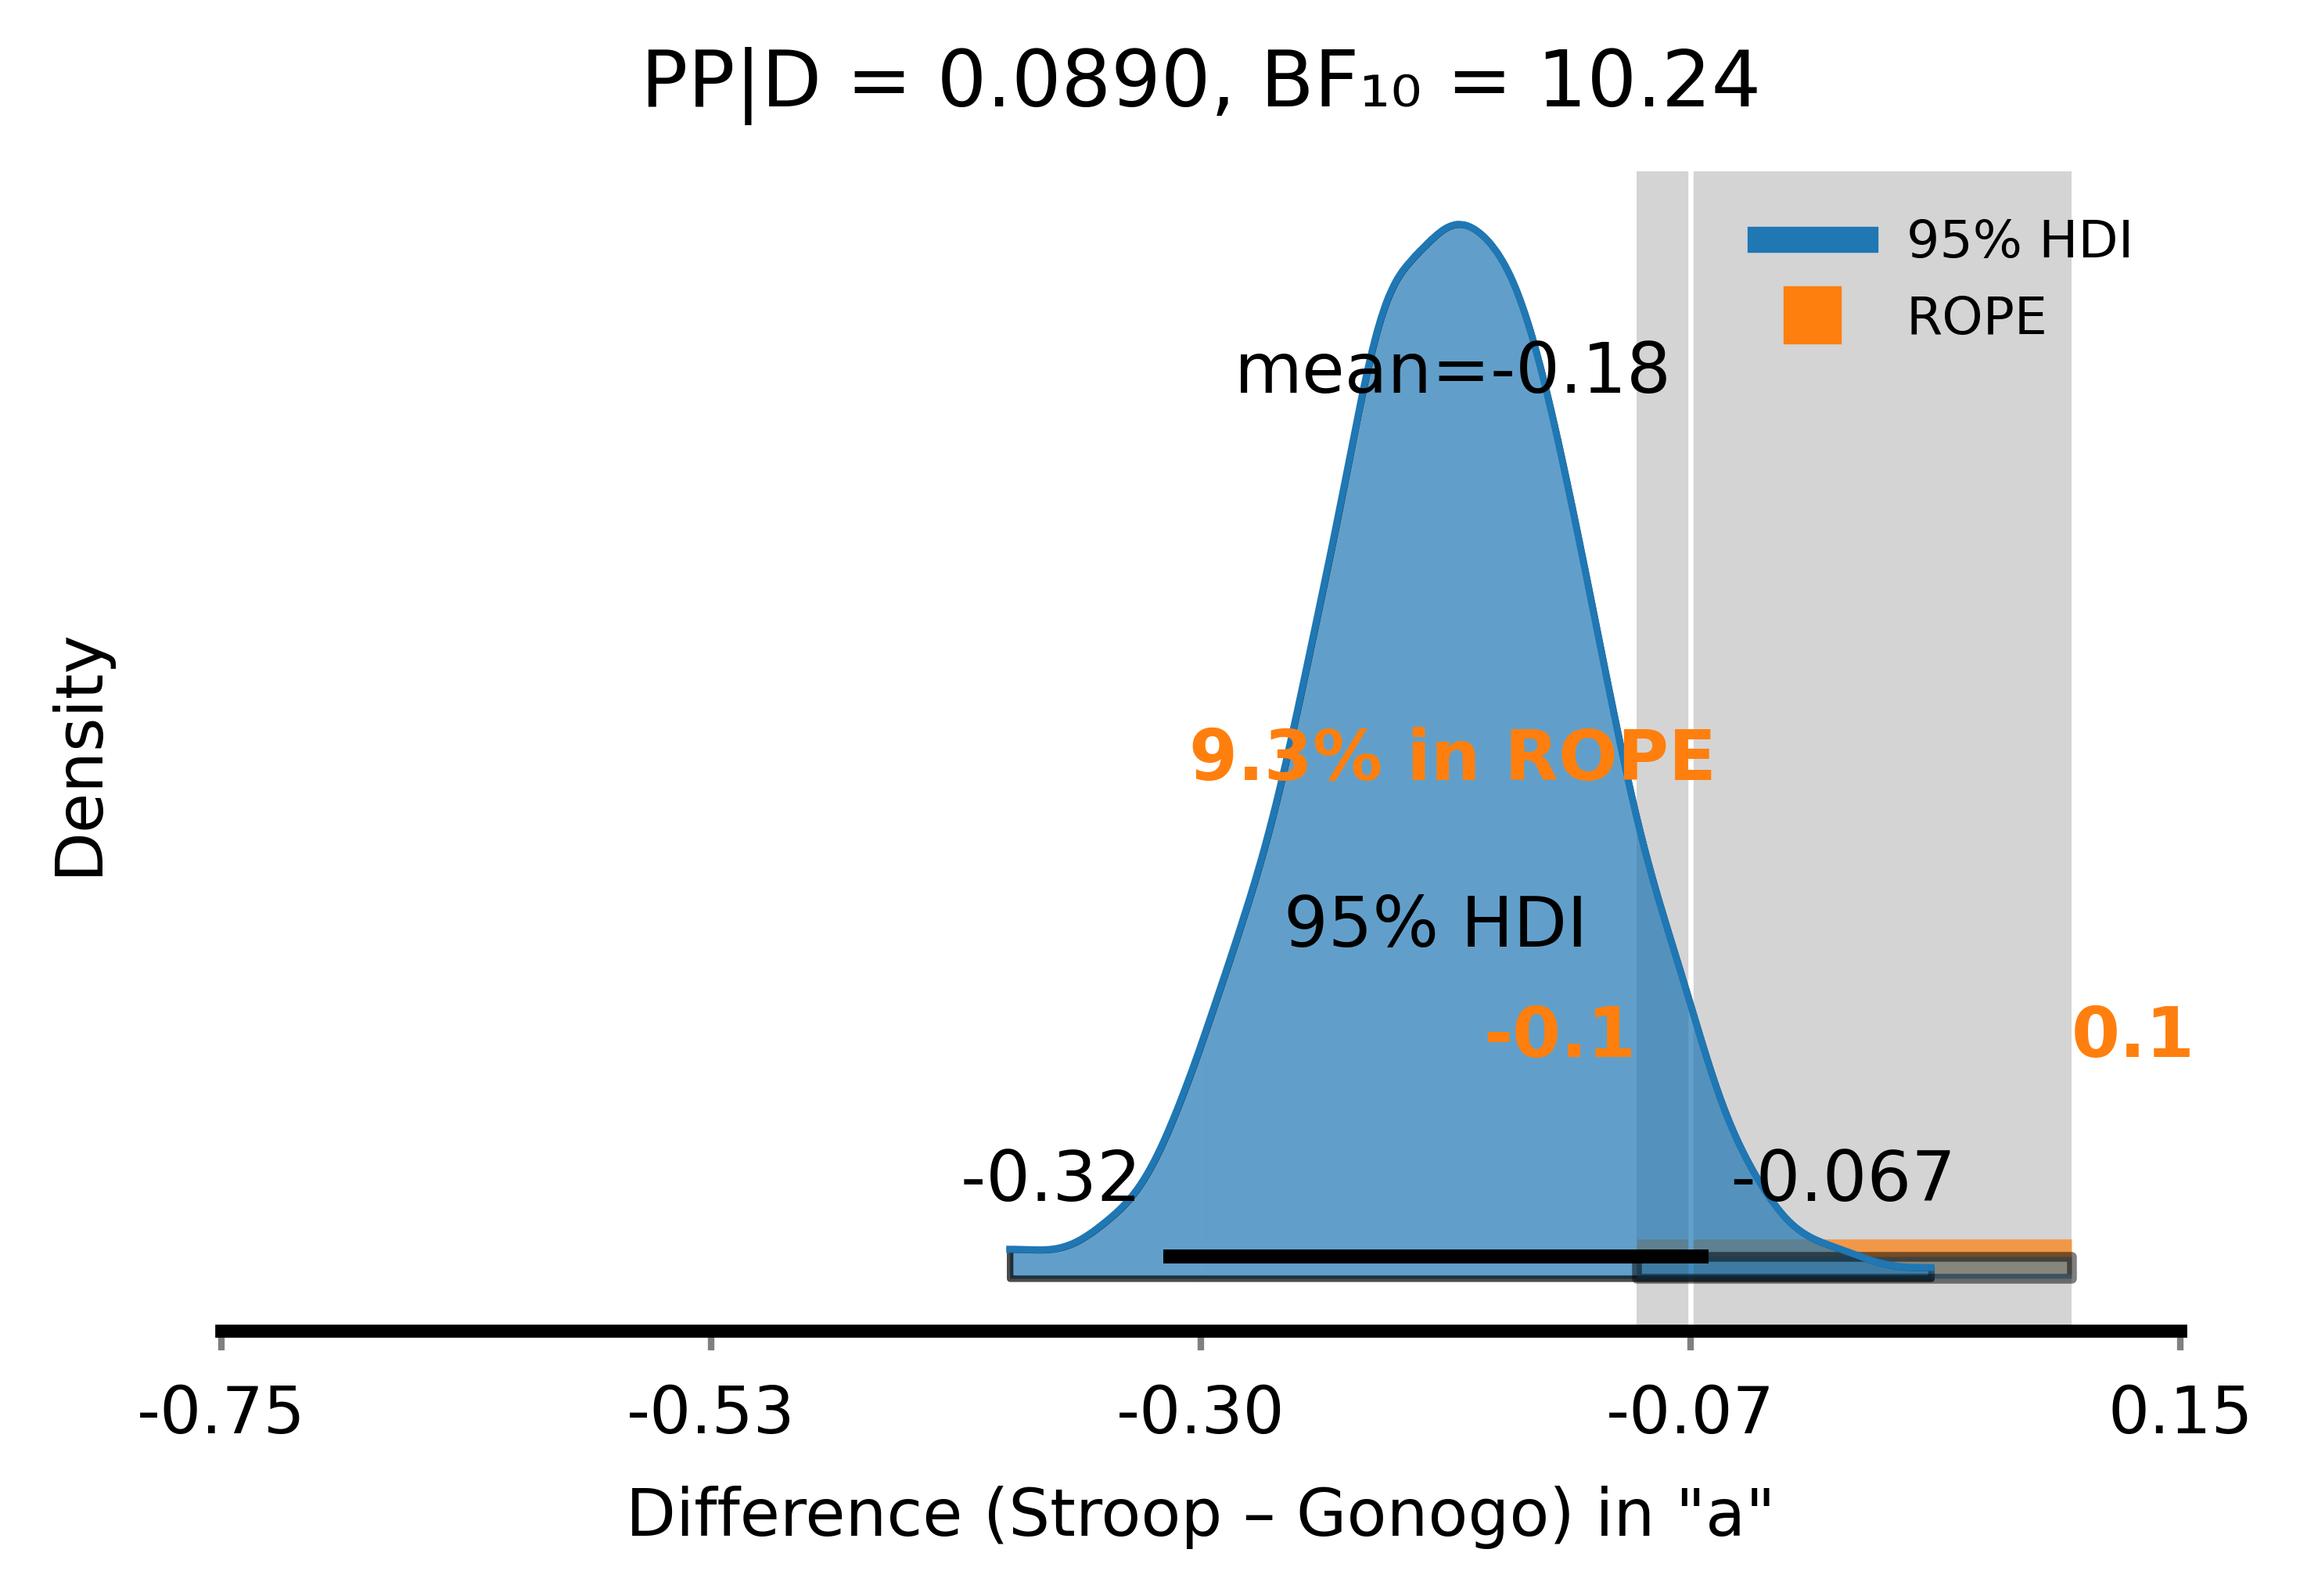

Saved difference plot: 6.统计推断-输出/m0/diff_a_stroop_vs_gonogo.jpg


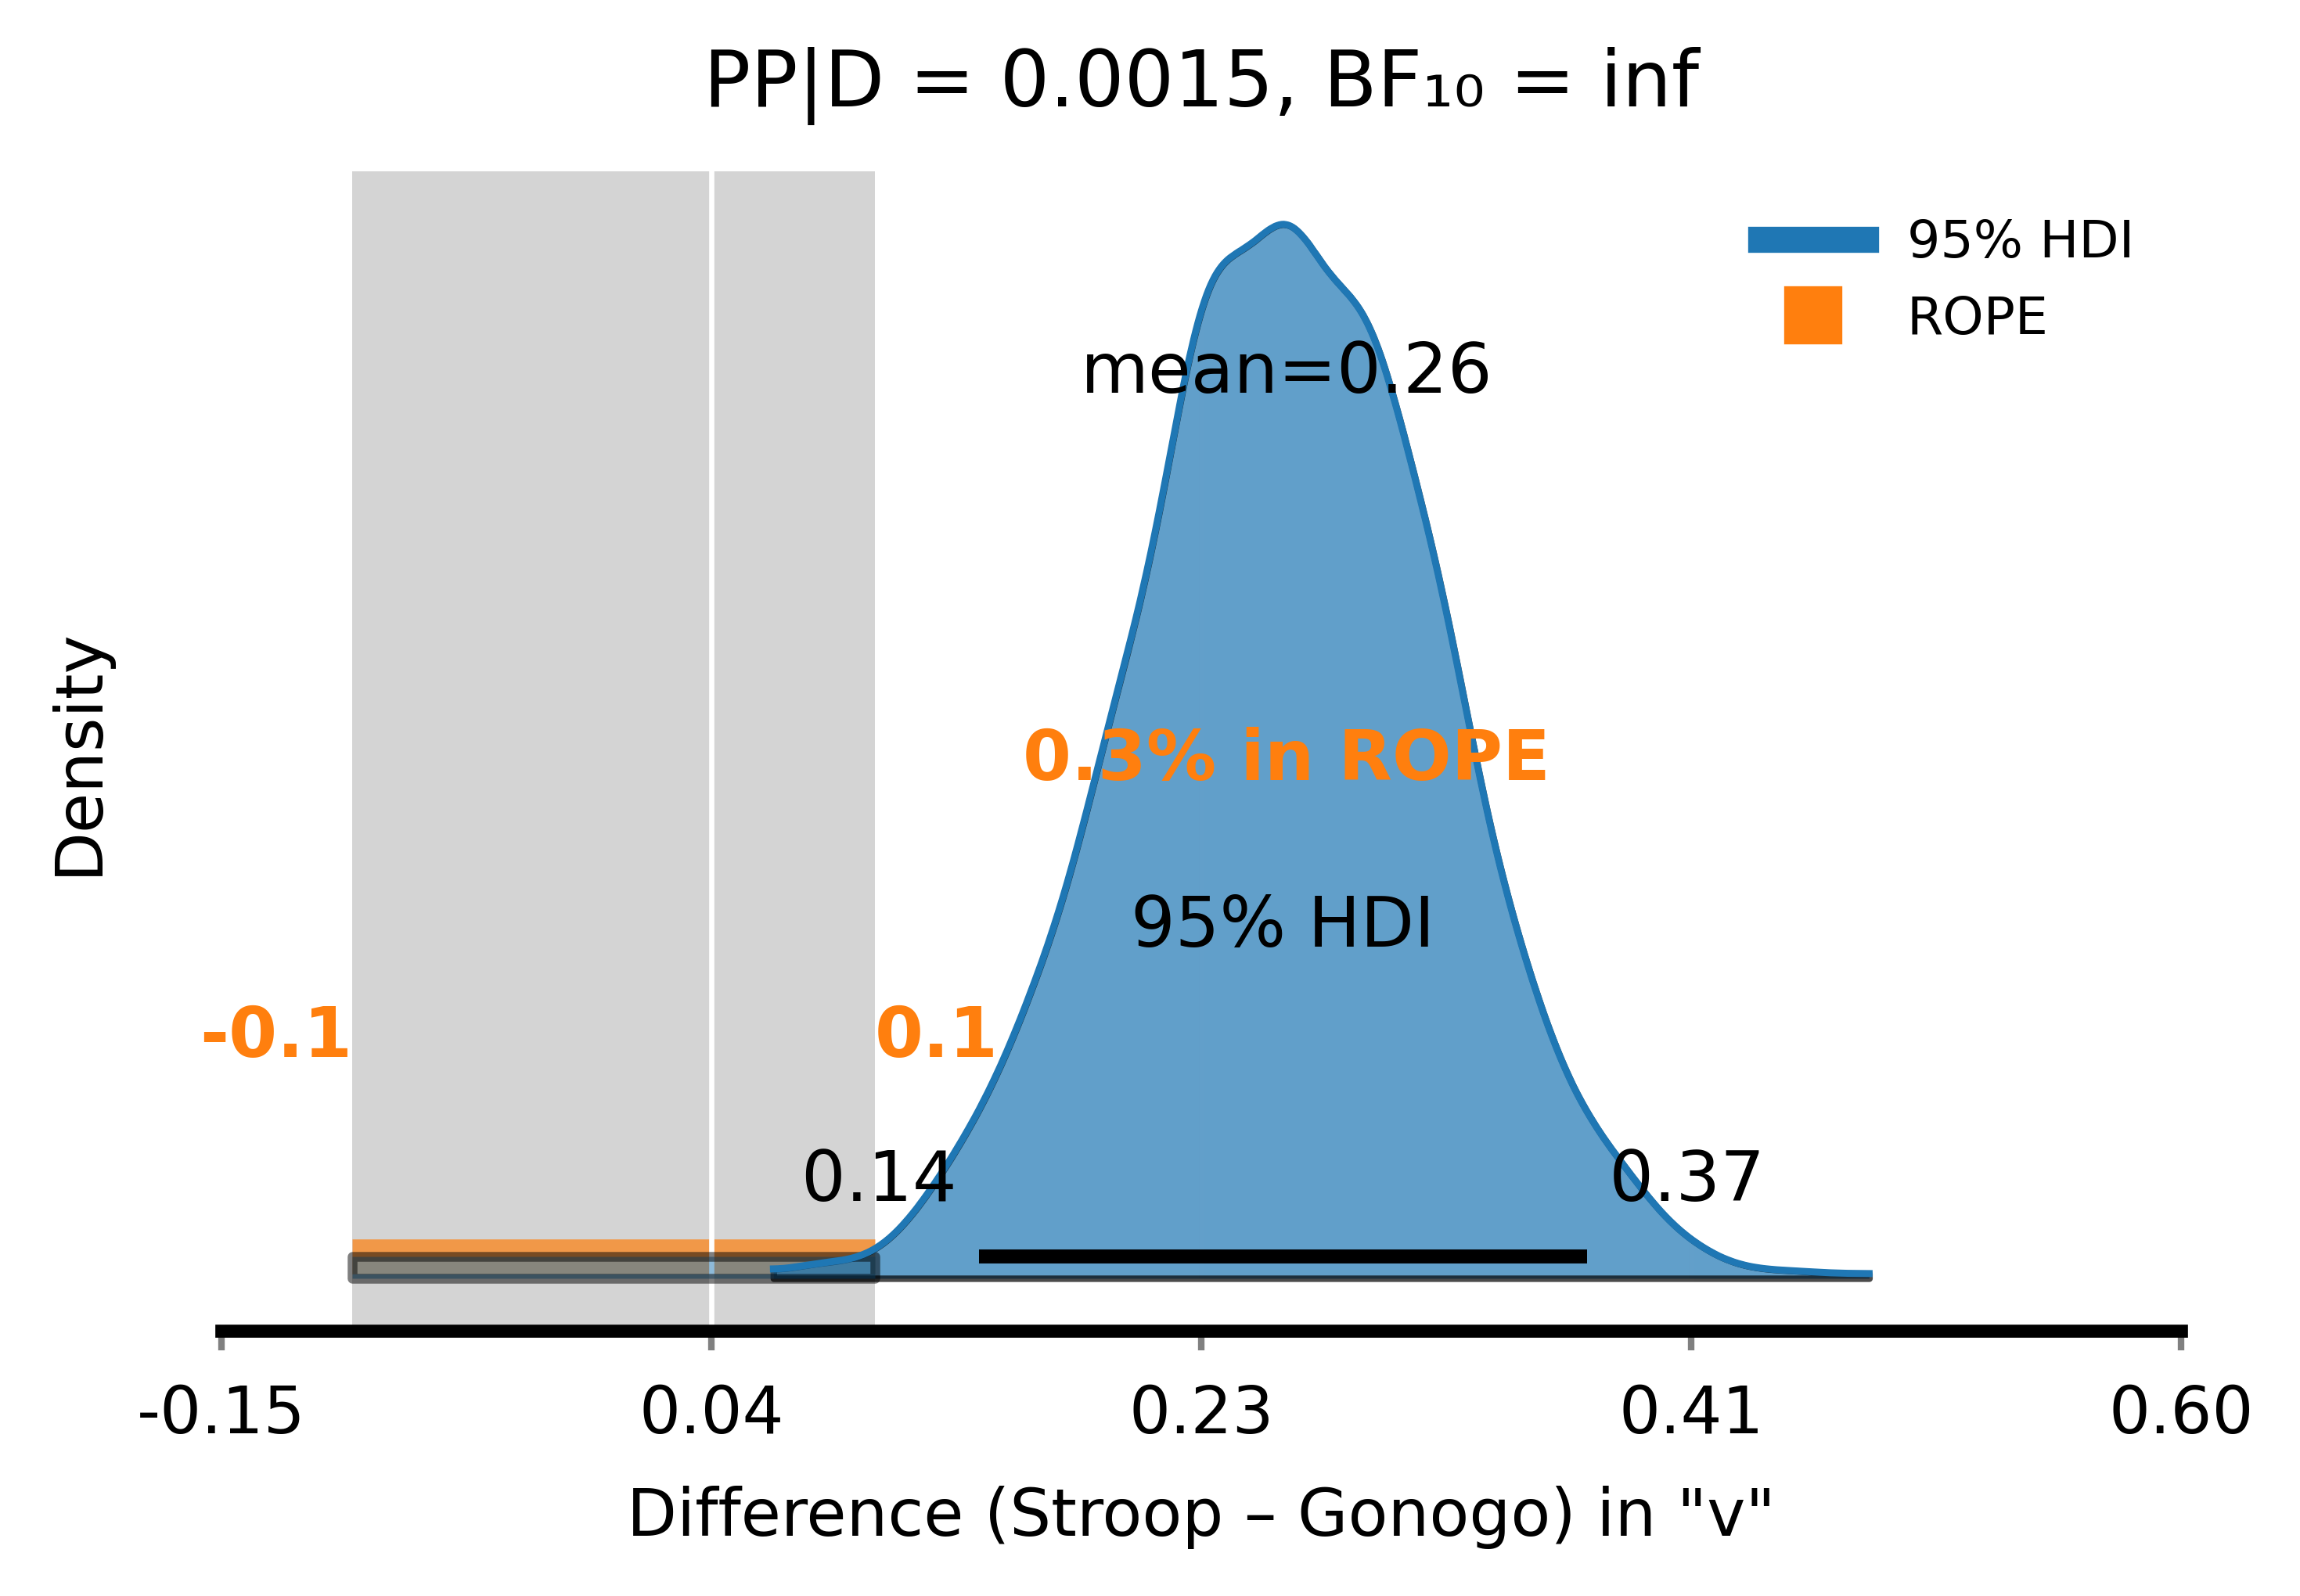

Saved difference plot: 6.统计推断-输出/m0/diff_v_stroop_vs_gonogo.jpg


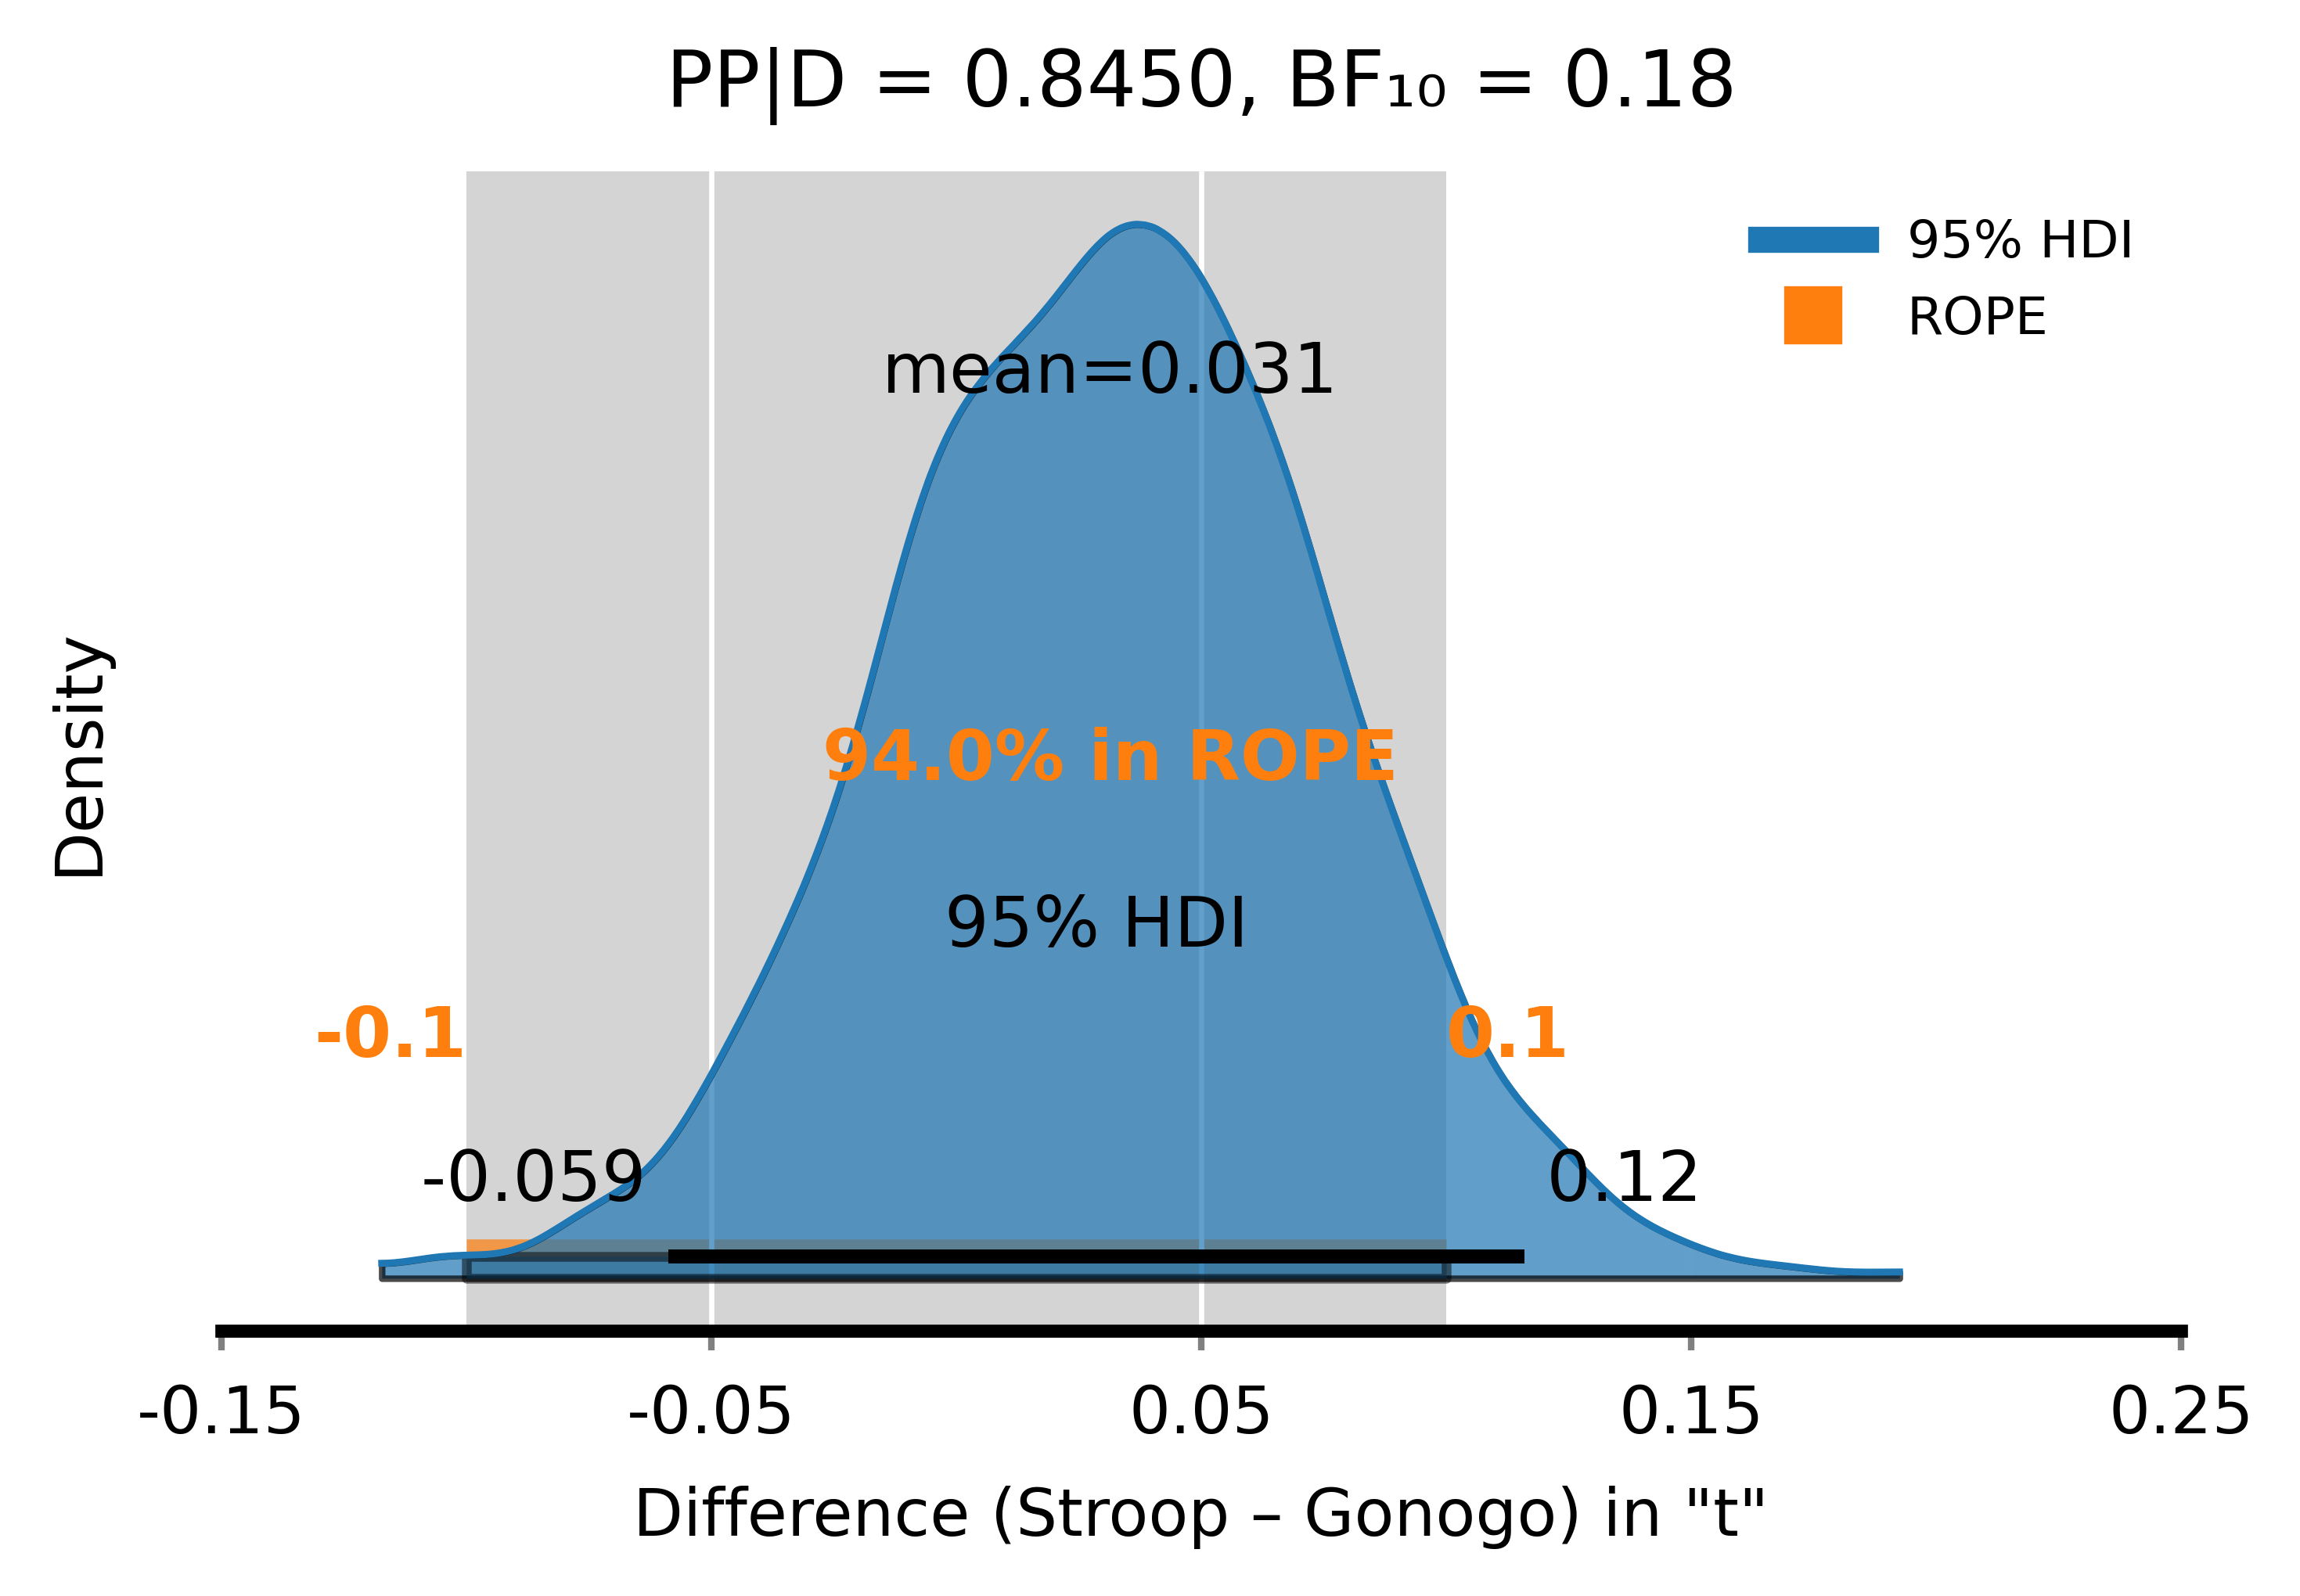

Saved difference plot: 6.统计推断-输出/m0/diff_t_stroop_vs_gonogo.jpg


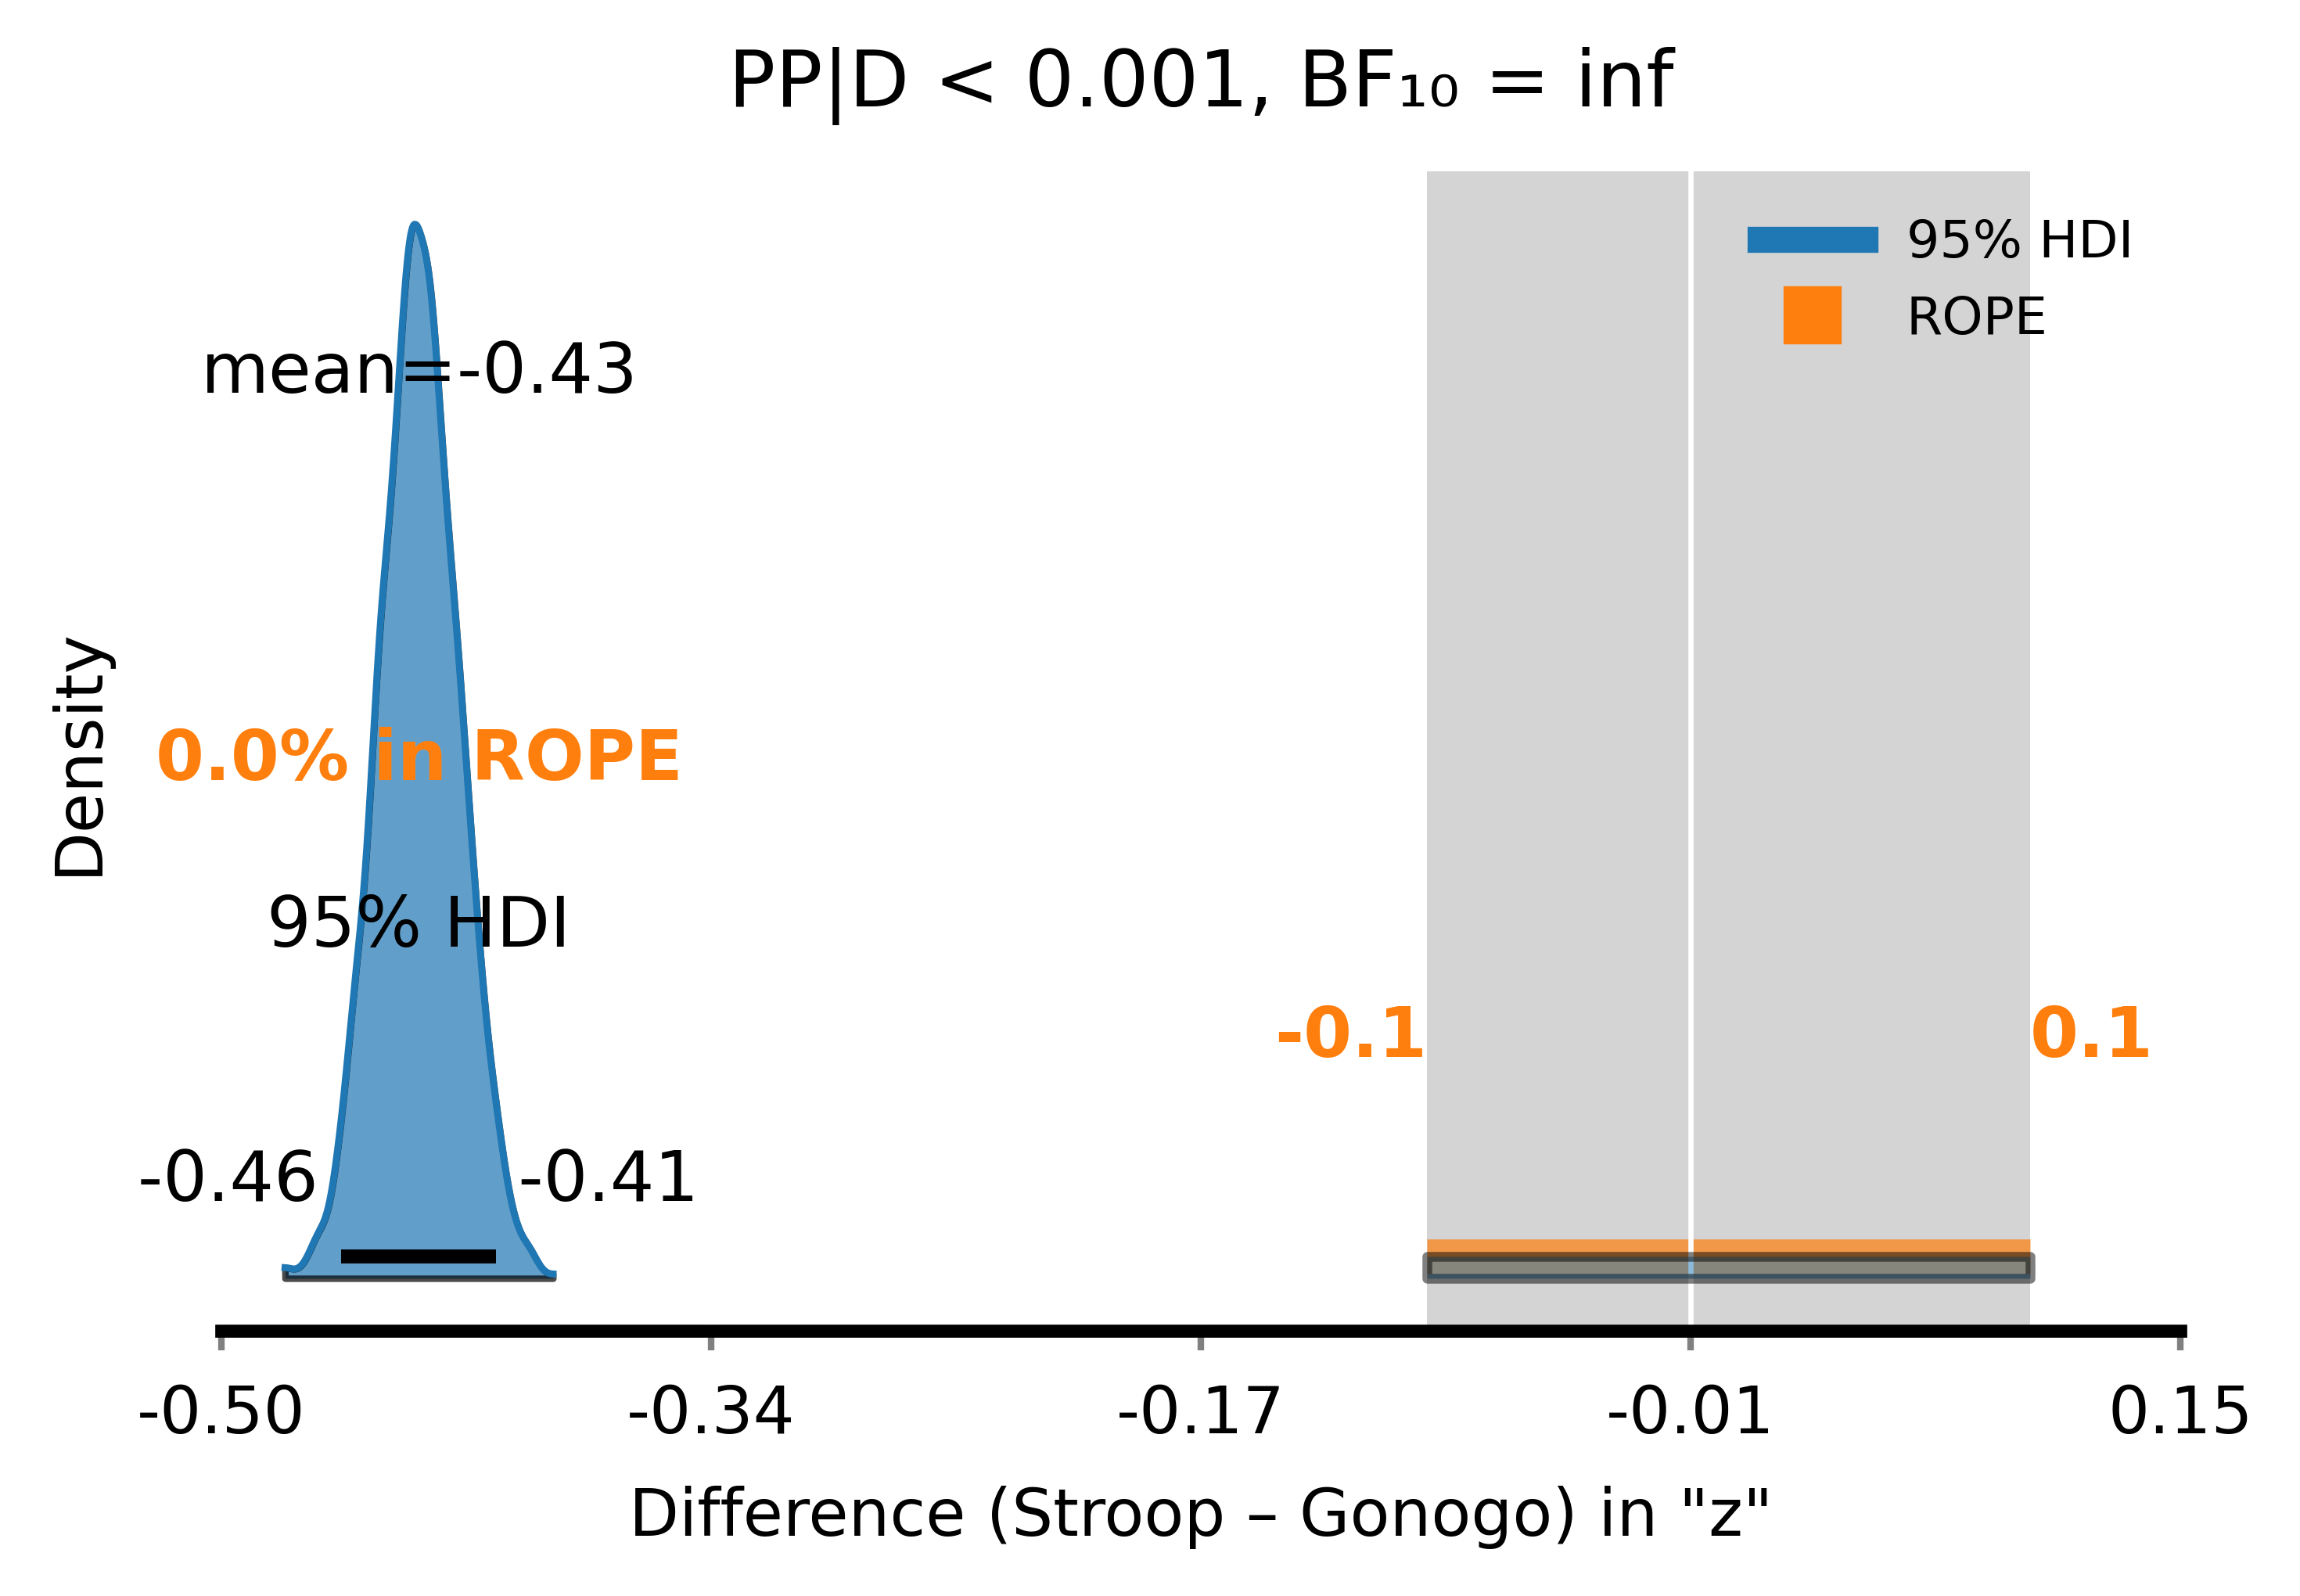

Saved difference plot: 6.统计推断-输出/m0/diff_z_stroop_vs_gonogo.jpg
┌────────────┬──────────────────┬──────────────────┬──────────────────┬────────────┬─────────┐
│ Parameter  │ Mean Difference  │ 95% HDI Lower    │ 95% HDI Upper    │   PP|D     │ BF₁₀    │
├────────────┼──────────────────┼──────────────────┼──────────────────┼────────────┼─────────┤
│ a          │          -0.1850 │          -0.3120 │          -0.0580 │     0.0890 │   10.24 │
│ v          │           0.2599 │           0.1450 │           0.3748 │     0.0015 │     inf │
│ t          │           0.0320 │          -0.0580 │           0.1220 │     0.8450 │    0.18 │
│ z          │          -0.4343 │          -0.4604 │          -0.4082 │     <0.001 │     inf │
└────────────┴──────────────────┴──────────────────┴──────────────────┴────────────┴─────────┘


In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
import os

# ------------------------------------------------------------------------------
# 设置输出目录
# ------------------------------------------------------------------------------
output_dir = "6.统计推断-输出/m0"
os.makedirs(output_dir, exist_ok=True)

# ------------------------------------------------------------------------------
# 0. 前提：直接读取已保存的 InferenceData
# ------------------------------------------------------------------------------

m0Stroop_infdata = az.open_data("model_fitted/m0Stroop")
m0Gonogo_infdata = az.open_data("model_fitted/m0Gonogo")

# ------------------------------------------------------------------------------
# 全局字体与配色设置
# ------------------------------------------------------------------------------
plt.rcParams['font.family']     = 'DejaVu Sans'
plt.rcParams['text.color']      = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color']     = 'black'
plt.rcParams['ytick.color']     = 'black'
plt.rcParams['legend.labelcolor']= 'black'
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.frameon']  = False

# ------------------------------------------------------------------------------
# 1. 配置：模型、参数、色彩、坐标轴
# ------------------------------------------------------------------------------
models_data = [
    ("Stroop", m0Stroop_infdata, "#1f77b4"),
    ("Gonogo", m0Gonogo_infdata, "#ff7f0e")
]
parameters = ['a', 'v', 't', 'z']
xlims = {
    'a': (0.7, 1.6),
    'v': (-0.5, 0.55),
    't': (0.0, 0.55),
    'z': (0.3, 1.2)
}
xticks = {p: np.linspace(*xlims[p], 7) for p in parameters}

# ------------------------------------------------------------------------------
# 2. 绘制 ridgeplots 比较
# ------------------------------------------------------------------------------
for param in parameters:
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(3.8, 3.4))
    fig.patch.set_alpha(0)
    for ax, (model_name, idata, color) in zip(axes, models_data):
        ax.patch.set_alpha(0)
        # 直接用真实 posterior 绘制 ridgeplot
        az.plot_forest(
            data=idata,
            kind='ridgeplot',
            var_names=[param],
            ridgeplot_overlap=3.5,
            ridgeplot_truncate=False,
            ridgeplot_quantiles=[.025, .5, .975],
            combined=True,
            colors=[color],
            ax=ax,
            ridgeplot_alpha=0.8
        )
        # 分位线
        samples = idata.posterior[param].values.flatten()
        for q in np.percentile(samples, [2.5, 50, 97.5]):
            ax.axvline(q, color=color, linestyle='--', linewidth=0.8)
        # 坐标轴
        ax.set_xlim(*xlims[param])
        ax.set_xticks(xticks[param])
        ax.set_xticklabels([f"{t:.2f}" for t in xticks[param]], fontsize=8, color='black')
        ax.set_ylabel(model_name, fontsize=10, rotation=0, labelpad=10,
                      fontweight='bold', color='black')
        ax.set_yticks([])
        # 边框样式
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.spines['bottom'].set_color('black')
        ax.spines['bottom'].set_linewidth(1.5)
    axes[-1].set_xlabel(f'Posterior of "{param}"', fontsize=10,
                        fontweight='bold', labelpad=8, color='black')
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    out = os.path.join(output_dir, f"ridgeplot_comparison_{param}.jpg")
    plt.savefig(out, dpi=1200, bbox_inches='tight', transparent=True)
    plt.show()
    print(f"[Saved] {out}")

# ------------------------------------------------------------------------------
# 3. 差异检验：参数 a, v, t, z （基于真实后验差值）
# ------------------------------------------------------------------------------
rope = 0.1
diff_xlims = {
    'a': (-0.75, 0.15),
    'v': (-0.15, 0.6),
    't': (-0.15, 0.25),
    'z': (-0.5, 0.15)
}

results = []
for param in parameters:
    # 提取样本并计算差值
    s_samples = m0Stroop_infdata.posterior[param].values.flatten()
    g_samples = m0Gonogo_infdata.posterior[param].values.flatten()
    diff_samples = s_samples - g_samples

    # 统计摘要
    mean_diff = diff_samples.mean()
    hdi_bounds = az.hdi(diff_samples, hdi_prob=0.95)
    ppd = np.mean(diff_samples > 0)

    # 绘制后验分布
    fig, ax = plt.subplots(figsize=(5, 3.5))
    fig.patch.set_alpha(0)
    ax.patch.set_alpha(0)

    az.plot_posterior(
        diff_samples,
        kind='kde',
        hdi_prob=0.95,
        rope=[-rope, rope],
        textsize=10,
        rope_color='gray',
        ax=ax,
        color='black'
    )
    # 样式调整
    if ax.collections:
        ax.collections[0].set_alpha(0.7)
        ax.collections[0].set_edgecolor('black')
        ax.collections[0].set_linewidth(1)
    if ax.lines:
        x, y = ax.lines[-1].get_xdata(), ax.lines[-1].get_ydata()
        ax.fill_between(x, y, color='black', alpha=0.5, edgecolor='black', linewidth=1.5)

    # 坐标与标签
    ax.set_xlim(*diff_xlims[param])
    ticks = np.linspace(*diff_xlims[param], 5)
    ax.set_xticks(ticks)
    ax.set_xticklabels([f"{t:.2f}" for t in ticks], color='black')
    ax.set_xlabel(f'Difference (Stroop – Gonogo) in "{param}"',
                  fontsize=10, labelpad=6, color='black')
    ax.set_ylabel('Density', fontsize=10, labelpad=12, color='black')
    ax.set_title(f'Mean Δ={mean_diff:.3f}, 95% HDI=[{hdi_bounds[0]:.3f}, {hdi_bounds[1]:.3f}], PP|D={ppd:.3f}',
                 fontsize=12, pad=10, color='black')

    # 加粗底部边框
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(2)

    # ROPE 区域阴影
    y0, y1 = ax.get_ylim()
    rect = plt.Rectangle((-rope, y0), 2*rope, y1 - y0,
                         linewidth=0, facecolor='gray', alpha=0.3, zorder=-1)
    ax.add_patch(rect)

    # 保存
    out = os.path.join(output_dir, f"diff_{param}_stroop_vs_gonogo.jpg")
    plt.tight_layout()
    plt.savefig(out, dpi=1200, bbox_inches='tight', transparent=True)
    plt.show()
    print(f"[Saved] {out}")

    # 收集结果
    results.append({
        'Parameter': param,
        'Mean Difference': mean_diff,
        '95% HDI Lower': hdi_bounds[0],
        '95% HDI Upper': hdi_bounds[1],
        'PP|D': ppd
    })

# ------------------------------------------------------------------------------
# 4. 打印结果表格
# ------------------------------------------------------------------------------
df_res = pd.DataFrame(results)
print(df_res.to_string(index=False, float_format='%.4f'))